In [1]:
from astroquery.vizier import Vizier
import astropy.units as u
from astropy.table import Table ,vstack
from astropy.table import join
import matplotlib.pyplot as plt
from astropy.table import unique
import numpy as np
from astropy.io import fits
# viz = Vizier(columns=['*'],row_limit=-1)
#
import scienceplots
import fitsio
import numpy as np
plt.style.use(['science', 'grid','notebook'])
# catalog=viz.get_catalogs("J/MNRAS/525/1106")
# catalog

In [11]:
# #tab4= catalog[4]
# FP=catalog['J/MNRAS/525/1106/tableb4']

# TF=catalog['J/MNRAS/525/1106/tableb5']
# pre1=catalog['J/MNRAS/525/1106/tableb1']
# pre2=catalog['J/MNRAS/525/1106/tableb2']
# pre3=catalog['J/MNRAS/525/1106/tableb3']
# tab6=catalog['J/MNRAS/525/1106/tableb6']
# tab7=catalog['J/MNRAS/525/1106/tableb7']
# tab8=catalog['J/MNRAS/525/1106/tableb8']
# tab9=catalog['J/MNRAS/525/1106/tableb9']

# pre1.write("tab1_desi_pre.fits", format="fits", overwrite=True)
# pre2.write("tab2_desi_pre.fits", format="fits", overwrite=True)
# pre3.write("tab3_desi_pre.fits", format="fits", overwrite=True)
# # tab6.write("tab6_desi.fits", format="fits", overwrite=True)
# tab7.write("tab7_desi.fits", format="fits", overwrite=True)
#tab8.write("tab8_desi.fits", format="fits", overwrite=True)
#tab9.write("tab9_desi.fits", format="fits", overwrite=True)
# FP.write("tab4_desi_fp.fits", format="fits", overwrite=True)
# TF.write("tab5_desi_tf.fits", format="fits", overwrite=True)
# tab8.write("tableb8.parquet", format="parquet", overwrite=True)
# tab9.write("tableb9.parquet", format="parquet", overwrite=True)



In [2]:
def BGS_mask(dr9_chunk):
    cuts2 = (
        (
            ((dr9_chunk['FIBERMAG_R'] < (5.1 + dr9_chunk['MAG_R'])) & (dr9_chunk['MAG_R'] <= 17.8)) |
            ((dr9_chunk['FIBERMAG_R'] < 22.9) & (dr9_chunk['MAG_R'] > 17.8) & (dr9_chunk['MAG_R'] < 20))
        ) &
        ((-1 < (dr9_chunk['MAG_G'] - dr9_chunk['MAG_R'])) &
         ((dr9_chunk['MAG_G'] - dr9_chunk['MAG_R']) < 4) &
         (-1 < (dr9_chunk['MAG_R'] - dr9_chunk['MAG_Z'])) &
         ((dr9_chunk['MAG_R'] - dr9_chunk['MAG_Z']) < 4)) &
        
        (dr9_chunk['NOBS_G'] > 0) &
        (dr9_chunk['NOBS_R'] > 0) &
        (dr9_chunk['NOBS_Z'] > 0) &
        
        (dr9_chunk['FLUX_G'] > 0) &
        (dr9_chunk['FLUX_R'] > 0) &
        (dr9_chunk['FLUX_Z'] > 0) &
        
        (
            ((dr9_chunk['GAIA_PHOT_G_MEAN_MAG'] - dr9_chunk['MAG_NOEXT_R']) > 0.6) |
            (dr9_chunk['GAIA_PHOT_G_MEAN_MAG'] == 0)
        ) &
        
        (~np.isin(dr9_chunk['MASKBITS'], [1, 12, 13])) &
        
        (dr9_chunk['FRACMASKED_G'] < 0.4) &
        (dr9_chunk['FRACMASKED_R'] < 0.4) &
        (dr9_chunk['FRACMASKED_Z'] < 0.4) &
        
        (dr9_chunk['FRACFLUX_G'] < 5) &
        (dr9_chunk['FRACFLUX_R'] < 5) &
        (dr9_chunk['FRACFLUX_Z'] < 5) &
        
        (dr9_chunk['FRACIN_G'] > 0.2) &
        (dr9_chunk['FRACIN_R'] > 0.2) &
        (dr9_chunk['FRACIN_Z'] > 0.2)
    )
    return cuts2

In [4]:
north= fits.open('/user/animesh.sah/FP_CUTS/north_cuts_v8_w1.fits')
south= fits.open('/user/animesh.sah/FP_CUTS/south_cuts_v8.fits')

data_north = north[1].data  


with fits.open("/user/animesh.sah/FP_CUTS/south_cuts_v9_w1.fits", memmap=False) as hdul:
    hdul.info
    data_south = hdul[1].data
table_2 = Table.read("tab2_desi_pre.fits", format="fits")
table_2.rename_column('BrickID', 'BRICKID')
table_2.rename_column('ObjID', 'OBJID')
table_2.rename_column('BrickName', 'BRICKNAME')



table_FP = Table.read("tab4_desi_fp.fits", format="fits")
table_FP.rename_column('BrickID', 'BRICKID')
table_FP.rename_column('ObjID', 'OBJID')
table_FP.rename_column('BrickName', 'BRICKNAME')
table_north = Table(data_north)
table_south = Table (data_south)

table_north_cut = table_north[table_north['DEC']>-30]
table_south_cut = table_south[table_south['DEC']>-30]

table = vstack([table_north_cut, table_south_cut])
#table

In [5]:
table

<Table length=484098>
BRICKID BRICKNAME OBJID TYPE ... MAG_NOEXT_Z Z_PHOT_MEDIAN  Z_PHOT_L95
 int32     str8   int32 str3 ...   float32      float32      float32  
------- --------- ----- ---- ... ----------- ------------- -----------
 326196  0371m007  3000  SER ...   17.378082    0.07897235 0.057566054
 326196  0371m007  3058  SER ...  15.7501335    0.09622078  0.06397838
 326196  0371m007  3091  SER ...   14.753273    0.06491999  0.03911662
 326196  0371m007  3889  SER ...   15.771027    0.07522254  0.06129543
 330518  0376p000  2188  SER ...   15.638908    0.09018374  0.04117998
 330518  0376p000  2694  SER ...   16.792141    0.14954486  0.09452175
 326197  0373m007   433  SER ...   15.779274    0.03089841  0.02015233
 326197  0373m007  1542  DEV ...   16.996239   0.097553335   0.0714637
 323316  0371m012   358  SER ...   15.052814    0.07322473 0.036685575
    ...       ...   ...  ... ...         ...           ...         ...
 517648  3517p342  2267  SER ...   17.212357    0.11272225 0.091795705
 517648  3517p342  3274  SER ...   15.967974    0.08233855  0.05750808
 503101  3511p312  3204  SER ...   17.240036    0.10271839  0.08060728
 503101  3511p312  4483  SER ...   16.908295    0.10713543 0.068402044
 501867  3511p310  3302  SER ...  15.3581705   0.043379687  0.03198362
 501867  3511p310  4479  SER ...    17.32791    0.10823335 0.028643869
 516453  3514p340  2393  SER ...   14.327591    0.05968383  0.04983318
 516453  3514p340  2449  SER ...   16.335615   0.053964674 0.020479206
 516453  3514p340  3057  SER ...   13.240189    0.04145728 0.028693072
 516453  3514p340  3085  SER ...   17.267239   0.065075934 0.040532216

In [4]:
len(table_north_cut), len(table_south_cut)


(144705, 339405)

In [ ]:
len(table_north_cut), len(table_south_cut)

(144704, 339407)

In [5]:
common = join(
    table_2,
    table,
    keys=[  'BRICKID','OBJID','BRICKNAME'],
    join_type='inner'
)

In [46]:
#common[['OBJID'	,'BRICKID','gmag','MAG_G','rmag','MAG_R','zmag','MAG_Z','RadCirc','R_CIRC']]
full_mask=BGS_mask(table)
table[full_mask]

<Table length=480896>
BRICKID BRICKNAME OBJID TYPE ... MAG_NOEXT_Z Z_PHOT_MEDIAN  Z_PHOT_L95
 int32     str8   int32 str3 ...   float32      float32      float32  
------- --------- ----- ---- ... ----------- ------------- -----------
 326196  0371m007  3000  SER ...   17.378082    0.07897235 0.057566054
 326196  0371m007  3058  SER ...  15.7501335    0.09622078  0.06397838
 326196  0371m007  3091  SER ...   14.753273    0.06491999  0.03911662
 326196  0371m007  3889  SER ...   15.771027    0.07522254  0.06129543
 330518  0376p000  2694  SER ...   16.792141    0.14954486  0.09452175
 326197  0373m007   433  SER ...   15.779274    0.03089841  0.02015233
 326197  0373m007  1542  DEV ...   16.996239   0.097553335   0.0714637
 323316  0371m012   358  SER ...   15.052814    0.07322473 0.036685575
 323316  0371m012   702  SER ...   16.583342    0.07060929 0.053166658
    ...       ...   ...  ... ...         ...           ...         ...
 517648  3517p342  2267  SER ...   17.212357    0.11272225 0.091795705
 517648  3517p342  3274  SER ...   15.967974    0.08233855  0.05750808
 503101  3511p312  3204  SER ...   17.240036    0.10271839  0.08060728
 503101  3511p312  4483  SER ...   16.908295    0.10713543 0.068402044
 501867  3511p310  3302  SER ...  15.3581705   0.043379687  0.03198362
 501867  3511p310  4479  SER ...    17.32791    0.10823335 0.028643869
 516453  3514p340  2393  SER ...   14.327591    0.05968383  0.04983318
 516453  3514p340  2449  SER ...   16.335615   0.053964674 0.020479206
 516453  3514p340  3057  SER ...   13.240189    0.04145728 0.028693072
 516453  3514p340  3085  SER ...   17.267239   0.065075934 0.040532216

In [50]:
#from astropy.io import fits
#from astropy.table import unique

unique_table = unique(table[full_mask], keys=['BRICKID', 'OBJID'])
table_match_final = table[full_mask]
# Save the table as a FITS file
table_match_final.write('table_match_final.fits', format='fits', overwrite=True)
#print('Saved table_match_final.fits')

<TableColumns names=('BRICKID','BRICKNAME','OBJID','TYPE','RA','DEC','FLUX_G','FLUX_R','FLUX_Z','MW_TRANSMISSION_G','MW_TRANSMISSION_R','MW_TRANSMISSION_Z','NOBS_G','NOBS_R','NOBS_Z','FRACFLUX_G','FRACFLUX_R','FRACFLUX_Z','FRACMASKED_G','FRACMASKED_R','FRACMASKED_Z','FRACIN_G','FRACIN_R','FRACIN_Z','SHAPE_R','SHAPE_E1','SHAPE_E2','FIBERFLUX_G','FIBERFLUX_R','FIBERFLUX_Z','GAIA_PHOT_G_MEAN_MAG','MASKBITS','SERSIC','R_CIRC','MAG_G','MAG_R','MAG_Z','FIBERMAG_G','FIBERMAG_R','FIBERMAG_Z','MAG_NOEXT_G','MAG_NOEXT_R','MAG_NOEXT_Z','Z_PHOT_MEDIAN','Z_PHOT_L95')>

In [25]:
keys_tab2 = set(zip(table_2['BRICKID'], table_2['OBJID'], table_2['BRICKNAME']))
keys_table = set(zip(table['BRICKID'], table['OBJID'],table['BRICKNAME']))


In [26]:
unmatched_keys = keys_table - keys_tab2


In [27]:
mask = [(brickid, objid,brickname) in unmatched_keys for brickid, objid,brickname in zip(table['BRICKID'], table['OBJID'],table['BRICKNAME'])]
unmatched_rows = table[mask]

In [28]:
ra_array=table_FP['RA_ICRS']
dec_array=table_FP['DE_ICRS']

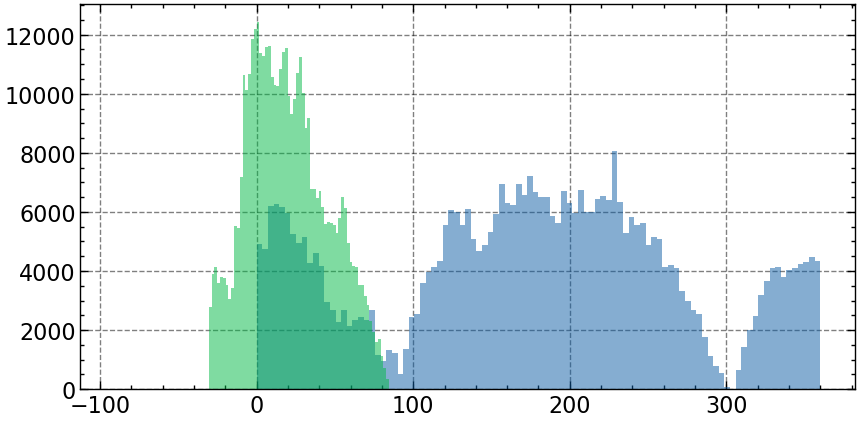

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(ra_array, bins=100, range=(0, 360), alpha=0.5, label='RA')
plt.hist(dec_array, bins=100, range=(-90, 90), alpha=0.5, label='Dec')
plt.show()

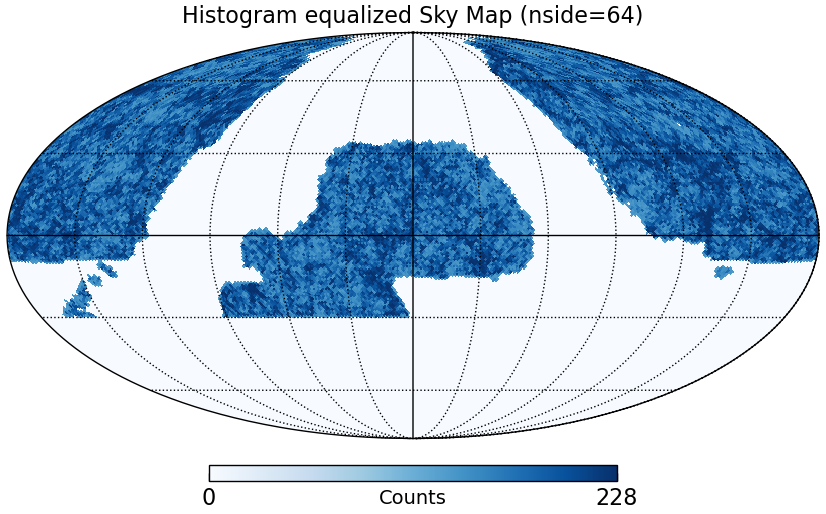

In [14]:
import healpy as hp
import numpy as np
import healpy.visufunc as hv

nside =64
npix = hp.nside2npix(nside)

theta = np.radians(90.0 - dec_array.data)  # theta = 0 at North Pole
phi = np.radians(ra_array.data) 
pix_indices = hp.ang2pix(nside, theta, phi)
hpx_map = np.zeros(npix, dtype=int)

ix,counts=np.unique(pix_indices,return_counts=True)
   # fill the fullsky map
hpx_map = np.zeros(npix, dtype=int)
hpx_map[ix] = counts
hp.mollview(hpx_map,cmap='Blues', unit='Counts',norm='hist',title=f"Histogram equalized Sky Map (nside={nside})")
hp.graticule()

In [15]:
sky_map = np.zeros(npix)

# Count number of sources per pixel
for pix in pix_indices:
    sky_map[pix] += 1

In [16]:
len(sky_map)
npix


49152

In [17]:
sky_map = np.bincount(pix_indices, minlength=npix)
sky_map


array([0, 0, 0, ..., 0, 0, 0])

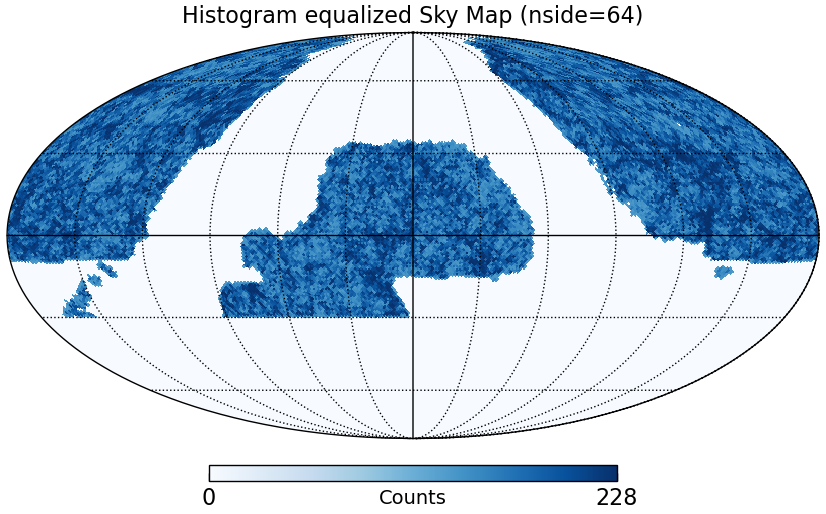

In [18]:
hp.mollview(sky_map, title=f"Histogram equalized Sky Map (nside={nside})",cmap='Blues', unit='Counts',norm='hist')
hp.graticule()
plt.show()

In [30]:
table_vizier_south = Table.read("../FP_CUTS/south_cuts_vizier.fits", format="fits")
table_vizier_north = Table.read("../FP_CUTS/north_cuts_vizier.fits", format="fits")


In [31]:
len(table_vizier_north) +len(table_vizier_south) -12449

427273

In [32]:
table_vizier_matched=vstack([table_vizier_north,table_vizier_south])
print('length of total matched:',len(table_vizier_matched))

print('unique length of matched:',len(unique(table_vizier_matched, keys=['BRICKID', 'OBJID'])))



length of total matched: 439722
unique length of matched: 427273


In [33]:
from collections import OrderedDict
e1, e2 = table_vizier_matched['SHAPE_E1'], table_vizier_matched['SHAPE_E2']
epsilon = np.sqrt(e1**2 + e2**2)
bba = (1 - epsilon) / (1 + epsilon)
table_vizier_matched['bba'] = bba
# Define all individual cuts
cuts_dict = OrderedDict({
    'MAG_R < 18': table_vizier_matched['MAG_R'] < 18,
    'G - R > 0.68': (table_vizier_matched['MAG_G'] - table_vizier_matched['MAG_R']) > 0.68,
    'G - R > 1.3*(R - Z) - 0.05': (table_vizier_matched['MAG_G'] - table_vizier_matched['MAG_R']) > (1.3 * (table_vizier_matched['MAG_R'] - table_vizier_matched['MAG_Z']) - 0.05),
    'G - R < 2.0*(R - Z) - 0.15': (table_vizier_matched['MAG_G'] - table_vizier_matched['MAG_R']) < (2.0 * (table_vizier_matched['MAG_R'] - table_vizier_matched['MAG_Z']) - 0.15),
    'R_CIRC > 0': table_vizier_matched['R_CIRC'] > 0,
    '1 - bba < 0.7': (1 - table_vizier_matched['bba']) < 0.7,
    'Sérsic condition': ((table_vizier_matched['TYPE'] == 'SER') & (table_vizier_matched['SERSIC'] > 2.5)) | (table_vizier_matched['TYPE'] == 'DEV'),
    'Z_PHOT_MEDIAN < 0.15': table_vizier_matched['Z_PHOT_MEDIAN'] < 0.15,
    'Z_PHOT_L95 < 0.1': table_vizier_matched['Z_PHOT_L95'] < 0.1,
})

total = len(table_vizier_matched)
current_mask = np.ones(total, dtype=bool)
print(f"Initial: {total} rows")

for name, cond in cuts_dict.items():
    current_mask &= cond
    passed = np.count_nonzero(current_mask)
    print(f"After '{name}': {passed} rows (lost {total - passed})")

Initial: 439722 rows
After 'MAG_R < 18': 427707 rows (lost 12015)
After 'G - R > 0.68': 427560 rows (lost 12162)
After 'G - R > 1.3*(R - Z) - 0.05': 427451 rows (lost 12271)
After 'G - R < 2.0*(R - Z) - 0.15': 427301 rows (lost 12421)
After 'R_CIRC > 0': 427296 rows (lost 12426)
After '1 - bba < 0.7': 427296 rows (lost 12426)
After 'Sérsic condition': 427294 rows (lost 12428)
After 'Z_PHOT_MEDIAN < 0.15': 424373 rows (lost 15349)
After 'Z_PHOT_L95 < 0.1': 418126 rows (lost 21596)


In [34]:
table_vizier_matched

<Table length=439722>
BRICKID BRICKNAME OBJID  TYPE  ... Z_PHOT_MEDIAN  Z_PHOT_L95    bba    
 int32    bytes8  int32 bytes3 ...    float32      float32    float32  
------- --------- ----- ------ ... ------------- ----------- ----------
 321728  0001m015  1509    EXP ...         -99.0       -99.0  0.3412679
 321732  0011m015   463    PSF ...         -99.0       -99.0        1.0
 321738  0026m015   210    REX ...         -99.0       -99.0        1.0
 321738  0026m015   700    PSF ...         -99.0       -99.0        1.0
 321739  0028m015   397    REX ...         -99.0       -99.0        1.0
 321741  0033m015   259    PSF ...         -99.0       -99.0        1.0
 321741  0033m015   362    PSF ...         -99.0       -99.0        1.0
 321745  0043m015   587    EXP ...         -99.0       -99.0  0.6666909
 321745  0043m015   958    PSF ...         -99.0       -99.0        1.0
    ...       ...   ...    ... ...           ...         ...        ...
 518839  3519p345   715    SER ...    0.10549146  0.08345663  0.5725221
 520021  3507p347   972    SER ...    0.11470948 0.099346414   0.932969
 520021  3507p347  1319    SER ...   0.113015376  0.09881768 0.74855447
 520021  3507p347  1374    SER ...    0.09231472  0.07686249 0.65642464
 520021  3507p347  2389    SER ...    0.10914555  0.07855799 0.70045984
 520022  3510p347  2177    SER ...    0.09894635 0.080525726  0.8134339
 520025  3519p347   560    SER ...   0.106026515  0.08092565 0.96484685
 520025  3519p347   585    SER ...    0.07255922 0.043559846  0.9388727
 520025  3519p347   594    SER ...    0.08244289  0.06475749 0.81889755
 520025  3519p347  1939    SER ...     0.1727046  0.14948018 0.78794295

In [24]:
#table_nonmask=table_vizier_matched[table_vizier_matched['MAG_R']>18]
#np.log10(table_nonmask['FLUX_R']/table_nonmask['MW_TRANSMISSION_R'])

/tmp/ipykernel_3351945/624491056.py:2: RuntimeWarning: divide by zero encountered in log10
  np.log10(table_nonmask['FLUX_R']/table_nonmask['MW_TRANSMISSION_R'])
/tmp/ipykernel_3351945/624491056.py:2: RuntimeWarning: invalid value encountered in log10
  np.log10(table_nonmask['FLUX_R']/table_nonmask['MW_TRANSMISSION_R'])


<Column name='FLUX_R' dtype='float32' length=12014>
        -inf
        -inf
        -inf
        -inf
        -inf
        -inf
        -inf
        -inf
        -inf
        -inf
        -inf
        -inf
         ...
 -0.76239336
 -0.45479318
 0.036868725
   0.6652818
  -0.6211205
 0.023269072
  0.19367711
  0.20554204
    1.027853
   0.9832056
-0.023787033

In [35]:
total = len(table_vizier_matched)
current_mask = np.ones(total, dtype=bool)
previous_count = total

print(f"{'Step':<35} | {'Remaining':>9} | {'Lost':>6} | {'Cumulative Lost':>16}")
print("-" * 70)

cumulative_lost = 0
for name, cond in cuts_dict.items():
    current_mask &= cond
    current_count = np.count_nonzero(current_mask)
    step_lost = previous_count - current_count
    cumulative_lost += step_lost
    print(f"{name:<35} | {current_count:>9} | {step_lost:>6} | {cumulative_lost:>16}")
    previous_count = current_count

Step                                | Remaining |   Lost |  Cumulative Lost
----------------------------------------------------------------------
MAG_R < 18                          |    427707 |  12015 |            12015
G - R > 0.68                        |    427560 |    147 |            12162
G - R > 1.3*(R - Z) - 0.05          |    427451 |    109 |            12271
G - R < 2.0*(R - Z) - 0.15          |    427301 |    150 |            12421
R_CIRC > 0                          |    427296 |      5 |            12426
1 - bba < 0.7                       |    427296 |      0 |            12426
Sérsic condition                    |    427294 |      2 |            12428
Z_PHOT_MEDIAN < 0.15                |    424373 |   2921 |            15349
Z_PHOT_L95 < 0.1                    |    418126 |   6247 |            21596


In [36]:

cuts = (
			(table_vizier_matched['MAG_R'] < 18) &
			((table_vizier_matched['MAG_G'] -table_vizier_matched['MAG_R']) > 0.68) &
			((table_vizier_matched['MAG_G']- table_vizier_matched['MAG_R']) > (1.3 * (table_vizier_matched['MAG_R'] - table_vizier_matched['MAG_Z']) - 0.05)) &
			((table_vizier_matched['MAG_G']- table_vizier_matched['MAG_R']) < (2.0 * (table_vizier_matched['MAG_R'] - table_vizier_matched['MAG_Z']) - 0.15)) &
			(table_vizier_matched['R_CIRC']> 0) &
			((1 -table_vizier_matched['bba']) < 0.7) &
			(((table_vizier_matched['TYPE'] == 'SER') & (table_vizier_matched['SERSIC'] > 2.5)) | (table_vizier_matched['TYPE'] == 'DEV')) &
			(table_vizier_matched['Z_PHOT_MEDIAN'] < 0.15) &
			(table_vizier_matched['Z_PHOT_L95'] < 0.1)
		)
table_vizier_matched[cuts]

unique_rows = unique(table_vizier_matched[cuts], keys=['BRICKID', 'OBJID'])
print(len(table_vizier_matched[cuts]), "rows after cuts")
print(len(unique_rows), "unique rows after FP cuts")
#unique_rows

#nonmask=~mask
#print(unique_rows[nonmask])

mask = ~np.any([col == -99 for col in unique_rows.itercols()], axis=0)
unique_rows = unique_rows[mask]
#mask = (unique_rows['Z_PHOT_MEDIAN'] != -99) & (unique_rows['Z_PHOT_L95'] != -99)
#unique_rows = unique_rows[mask]
#print(len(unique_rows), "rows after removing -99 values")
Mask_unique_rows=BGS_mask(unique_rows)
print('length after applying BGS cuts:',len(unique_rows[Mask_unique_rows]))
final_unique_rows=unique_rows[Mask_unique_rows]

418126 rows after cuts
418113 unique rows after FP cuts
length after applying BGS cuts: 417308


In [27]:
common = join(
    table_F,
    table_FP,
    keys=[  'BRICKID','OBJID','BRICKNAME'],
    join_type='inner'
)

NameError: name 'table_F' is not defined

In [ ]:
#table_FP[(table_FP['BRICKID']==321728) &  (table_FP['OBJID']==1509)]

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2894280986.py, line 1)

In [ ]:
bad_mask = (
    (table_vizier_matched['Z_PHOT_MEDIAN'] == -99) |
    (table_vizier_matched['FLUX_G'] == 0) |
    (table_vizier_matched['FLUX_R'] == 0) |
    (table_vizier_matched['FLUX_Z'] == 0)
)
bad_table_vizier=table_vizier_matched[bad_mask]


<Table length=5054>
BRICKID BRICKNAME OBJID  TYPE  ... Z_PHOT_MEDIAN Z_PHOT_L95    bba    
 int32    bytes8  int32 bytes3 ...    float32     float32    float32  
------- --------- ----- ------ ... ------------- ---------- ----------
 321728  0001m015  1509    EXP ...         -99.0      -99.0  0.3412679
 321732  0011m015   463    PSF ...         -99.0      -99.0        1.0
 321738  0026m015   210    REX ...         -99.0      -99.0        1.0
 321738  0026m015   700    PSF ...         -99.0      -99.0        1.0
 321739  0028m015   397    REX ...         -99.0      -99.0        1.0
 321741  0033m015   259    PSF ...         -99.0      -99.0        1.0
 321741  0033m015   362    PSF ...         -99.0      -99.0        1.0
 321745  0043m015   587    EXP ...         -99.0      -99.0  0.6666909
 321745  0043m015   958    PSF ...         -99.0      -99.0        1.0
    ...       ...   ...    ... ...           ...        ...        ...
 514997  2734p337   784    REX ...         -99.0      -99.0        1.0
 516190  2722p340   150    REX ...         -99.0      -99.0        1.0
 516190  2722p340   898    PSF ...         -99.0      -99.0        1.0
 516191  2725p340   633    EXP ...         -99.0      -99.0 0.50774235
 517386  2727p342   362    REX ...         -99.0      -99.0        1.0
 517386  2727p342  2584    PSF ...         -99.0      -99.0        1.0
 310011  3098m037  6012    SER ...         -99.0      -99.0  0.6146452
 411520  3148p140  1502    SER ...         -99.0      -99.0   0.645487
 274355  3370m100  4670    SER ...         -99.0      -99.0  0.8276569
 314514  3566m030  1070    SER ...         -99.0      -99.0 0.39350832

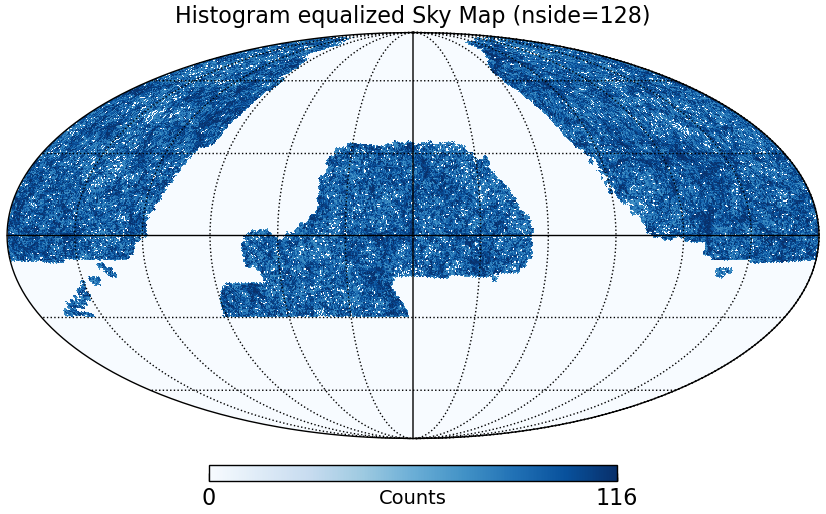

In [ ]:
import healpy as hp
import numpy as np
import healpy.visufunc as hv
ra_array=final_unique_rows['RA']
dec_array=final_unique_rows['DEC']
nside =128
npix = hp.nside2npix(nside)

theta = np.radians(90.0 - dec_array.data)  # theta = 0 at North Pole
phi = np.radians(ra_array.data) 
pix_indices = hp.ang2pix(nside, theta, phi)
hpx_map = np.zeros(npix, dtype=int)

ix,counts=np.unique(pix_indices,return_counts=True)
   # fill the fullsky map
hpx_map = np.zeros(npix, dtype=int)
hpx_map[ix] = counts
hp.mollview(hpx_map,cmap='Blues', unit='Counts',norm='hist',title=f"Histogram equalized Sky Map (nside={nside})")
hp.graticule()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize ,LogNorm
from matplotlib.cm import get_cmap, ScalarMappable

zphot = np.array(final_unique_rows['Z_PHOT_MEDIAN'])
x = final_unique_rows["MAG_R"] - final_unique_rows["MAG_Z"]
y = final_unique_rows["MAG_G"] - final_unique_rows["MAG_R"]

# Create colormap and normalization
valid = zphot != -99
norm = Normalize(vmin=zphot[valid].min(), vmax=zphot[valid].max())
cmap = get_cmap('YlGnBu')

# Compute RGBA colors
colors_all = np.zeros((len(zphot), 4))  # RGBA, shape (N, 4)
colors_all[valid] = cmap(norm(zphot[valid]))  # apply colormap to valid entries
colors_all[~valid] = [0, 0, 0, 1]  # black for zphot == -99

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color=colors_all, alpha=0.9, s=0.1)

plt.xlabel("mag$_R$ - mag$_Z$")
plt.ylabel("mag$_G$ - mag$_R$")
plt.title("Color-Color Scatter Diagram ")
plt.grid(True)

# Colorbar only for valid entries
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Z_PHOT_MEDIAN")

plt.tight_layout()
plt.show()


NameError: name 'final_unique_rows' is not defined

/tmp/ipykernel_3319101/2829307743.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Z_PHOT_MEDIAN')


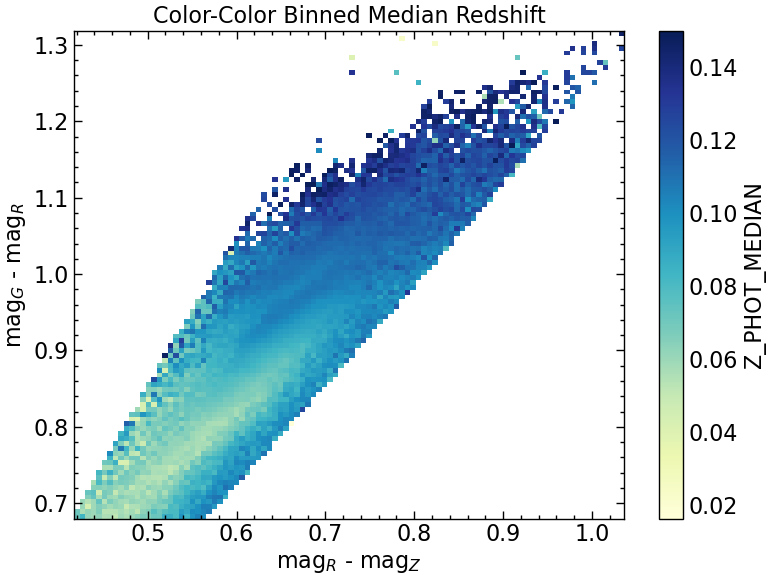

In [ ]:
from scipy.stats import binned_statistic_2d

stat, x_edges, y_edges, _ = binned_statistic_2d(x, y, zphot, statistic='median', bins=100)
plt.imshow(stat.T, origin='lower', aspect='auto', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], cmap='YlGnBu')
plt.colorbar(label='Z_PHOT_MEDIAN')
plt.xlabel("mag$_R$ - mag$_Z$")
plt.ylabel("mag$_G$ - mag$_R$")
plt.title("Color-Color Binned Median Redshift")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
cmap = get_cmap('autumn')

norm = LogNorm(vmin=zphot[valid].min(), vmax=zphot[valid].max())
colors_all[valid] = cmap(norm(zphot[valid]))
colors_all[~valid] = [0, 0, 0, 1]  # black for invalid



In [ ]:
common = join(
    table_vizier_north,
    table_vizier_south,
    keys=[  'BRICKID','OBJID','BRICKNAME'],
    join_type='inner'
)
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color=colors_all, alpha=0.9, s=0.5)

plt.xlabel("MAG_R - MAG_Z")
plt.ylabel("MAG_G - MAG_R")
plt.title("Color-Color Diagram (Log Colormap)")
plt.grid(True)

# Colorbar for valid zphot
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Z_PHOT_MEDIAN (log scale)")

plt.tight_layout()
plt.show()

NameError: name 'x' is not defined

<Figure size 600x600 with 0 Axes>

In [ ]:
common = join(
    table,
    unique_rows,
    keys=[  'BRICKID','OBJID','BRICKNAME'],
    join_type='inner')

In [ ]:
keys_tab2 = set(zip(table_match_final['BRICKID'], table_match_final['OBJID'], table_match_final['BRICKNAME']))
keys_table = set(zip(final_unique_rows['BRICKID'], final_unique_rows['OBJID'],final_unique_rows['BRICKNAME']))

In [ ]:
#all of keys in unique_rows are in table but not vice versa
unmatched_keys=keys_tab2 - keys_table

In [ ]:
mask = [(brickid, objid,brickname) in unmatched_keys for brickid, objid,brickname in zip(table['BRICKID'], table['OBJID'],table['BRICKNAME'])]
unmatched_rows = table[mask]

In [ ]:

#unmatched_rows
unmatched_rows == unique(unmatched_rows, keys=['BRICKID', 'OBJID','BRICKNAME'])

print(len(unmatched_rows), "unmatched rows")
mask = ~np.any([col == -99 for col in unmatched_rows.itercols()], axis=0)
unmatched_rows = unmatched_rows[mask]
unmatched_rows

13441 unmatched rows


<Table length=13127>
BRICKID BRICKNAME OBJID TYPE ... MAG_NOEXT_Z Z_PHOT_MEDIAN  Z_PHOT_L95
 int32     str8   int32 str3 ...   float32      float32      float32  
------- --------- ----- ---- ... ----------- ------------- -----------
 326196  0371m007  3000  SER ...   17.378082    0.07897235 0.057566054
 326196  0371m007  3058  SER ...  15.7501335    0.09622078  0.06397838
 326196  0371m007  3091  SER ...   14.753273    0.06491999  0.03911662
 326196  0371m007  3889  SER ...   15.771027    0.07522254  0.06129543
 330518  0376p000  2188  SER ...   15.638908    0.09018374  0.04117998
 330518  0376p000  2694  SER ...   16.792141    0.14954486  0.09452175
 326197  0373m007   433  SER ...   15.779274    0.03089841  0.02015233
 326197  0373m007  1542  DEV ...   16.996239   0.097553335   0.0714637
 323316  0371m012   358  SER ...   15.052814    0.07322473 0.036685575
    ...       ...   ...  ... ...         ...           ...         ...
 477857  3554p262  4655  SER ...   15.229041   0.036233023  0.02787319
 491903  3564p290  3235  SER ...   17.291174    0.07823168 0.058694754
 496921  3569p300  2556  SER ...   15.437928    0.11372742 0.087393254
 475253  3515p257  3036  SER ...     16.6955    0.03438127 0.024318123
 489359  3513p285  3445  SER ...   14.862272   0.028432718 0.009376085
 471346  3513p250  3534  SER ...   17.165375    0.10386084  0.07638049
 518844  3534p345  2026  SER ...   15.859208    0.08926407  0.07731301
 508030  3589p322  2934  DEV ...   17.362051    0.09990297 0.045740835
 514075  3568p335  3409  SER ...     17.3592     0.0958421 0.038193893
 500633  3517p307  1595  SER ...   13.781831   0.031369664 0.022878937

492937

In [19]:
def prepare_coords(ra_deg, dec_deg):
    ra_rad = np.radians(ra_deg)
    ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)  # Normalize to [0, 2π]
    ra_rad[ra_rad > np.pi] -= 2*np.pi                # Shift to [-π, π]
    ra_rad = -ra_rad                                  # Flip for Mollweide
    dec_rad = np.radians(dec_deg)
    return ra_rad, dec_rad    
unmatched_ra, unmatched_dec = prepare_coords(unmatched_rows['RA'], unmatched_rows['DEC'])
#ra_n, dec_n = prepare_coords(unmatched_rows['RA'], unmatched_rows['DEC'])


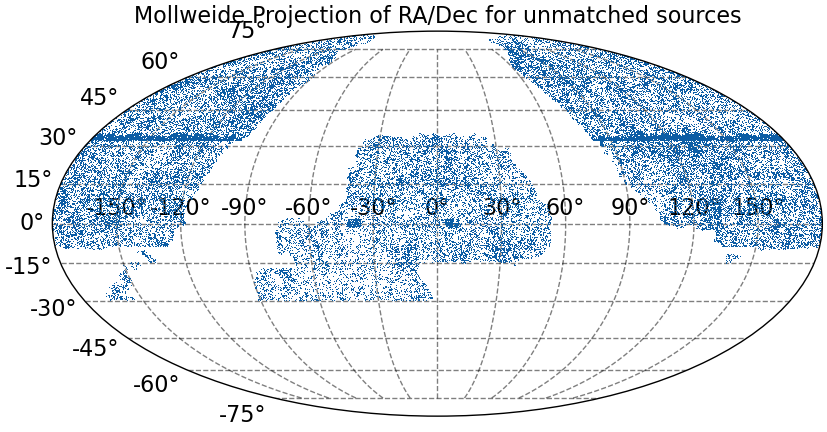

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')
ax.plot(unmatched_ra, unmatched_dec, ',')
#ax.plot(ra_n, dec_n, ',')
ax.grid(True)
plt.title('Mollweide Projection of RA/Dec for unmatched sources')
plt.show()

In [ ]:
unmatched_ra

<Column name='RA' dtype='float64' length=63575>
-0.6487925719098637
-0.6488445505526208
-0.6488725335793113
-0.6495910558326727
-0.6573267158693472
-0.6505608676150016
-0.6517621334888819
-0.6459997471612589
-0.6463937417812273
-0.6471009848742897
-0.6593724620141321
-0.6592606353488621
                ...
 0.1743106286570697
0.17283483012715095
0.15109204959584588
0.14415447379448665
 0.1576560201601609
0.14160242028326664
0.14570654906821723
0.14672748556970205
0.14516964297583534
0.15697158716126225
0.14262334593024661

/tmp/ipykernel_3319101/364697140.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, label="Z_PHOT_MEDIAN")


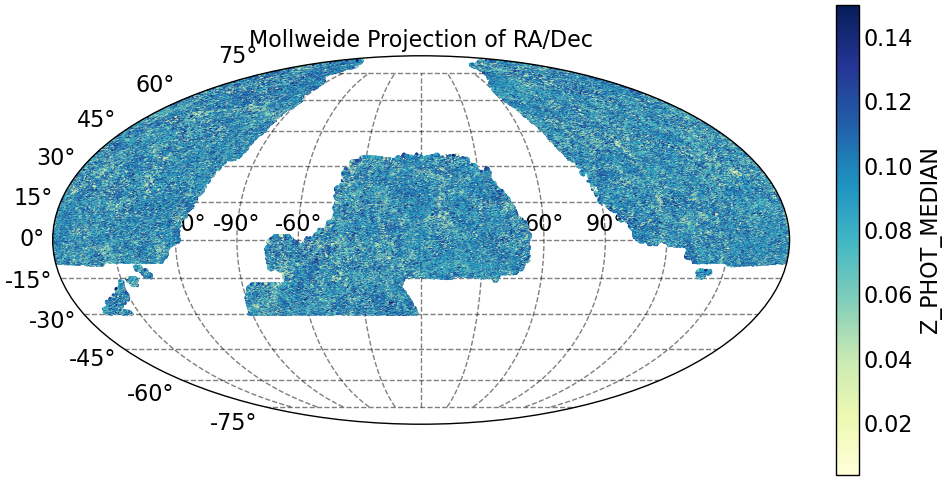

In [ ]:
from matplotlib.colors import Normalize   
unique_ra, unique_dec = prepare_coords(unique_rows['RA'], unique_rows['DEC'])
zphot = np.array(unique_rows['Z_PHOT_MEDIAN'])


# Create colormap and normalization
valid = zphot != -99
norm = Normalize(vmin=zphot[valid].min(), vmax=zphot[valid].max())
cmap = get_cmap('YlGnBu')

# Compute RGBA colors
colors_all = np.zeros((len(zphot), 4))  # RGBA, shape (N, 4)
colors_all[valid] = cmap(norm(zphot[valid]))  # apply colormap to valid entries
colors_all[~valid] = [0, 0, 0, 1]  # black for zphot == -99

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')

sc = ax.scatter(unique_ra, unique_dec, c=colors_all, s=1, cmap=cmap, norm=norm)
#ax.plot(ra_n, dec_n, ',')
ax.grid(True)
plt.title('Mollweide Projection of RA/Dec')

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Z_PHOT_MEDIAN")

plt.tight_layout()
plt.show()

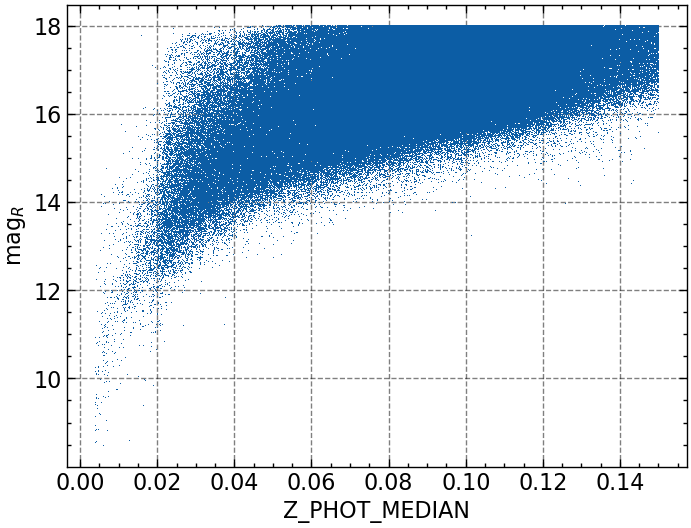

In [ ]:
plt.plot(zphot.data,mag_r.data,',')
plt.xlabel('Z_PHOT_MEDIAN')
plt.ylabel('mag$_R$')
plt.show()

/tmp/ipykernel_3319101/3281312334.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, label="MAG_R")


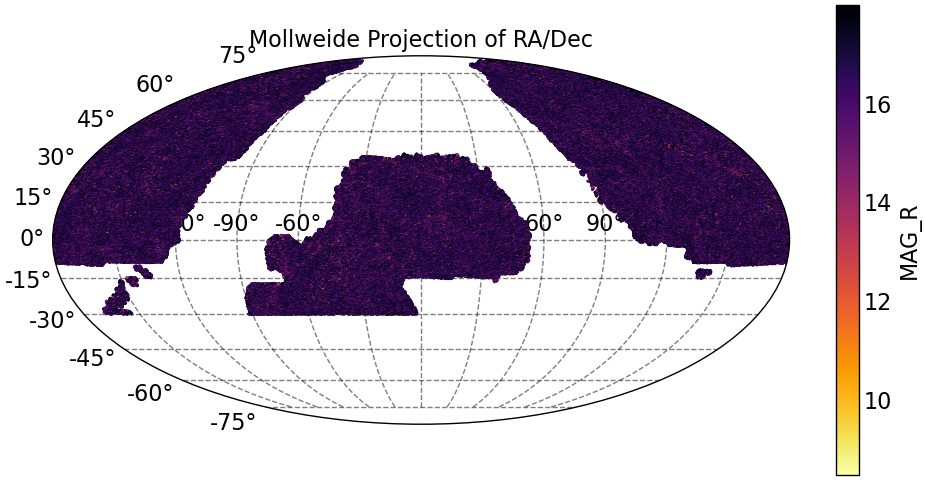

In [ ]:
from matplotlib.colors import Normalize   
unique_ra, unique_dec = prepare_coords(unique_rows['RA'], unique_rows['DEC'])
mag_r = np.array(unique_rows['MAG_R'])


# Create colormap and normalization
valid = zphot != -99
norm = Normalize(vmin=mag_r[valid].min(), vmax=mag_r[valid].max())
cmap = get_cmap('inferno_r')

# Compute RGBA colors
colors_all = np.zeros((len(mag_r), 4))  # RGBA, shape (N, 4)
colors_all[valid] = cmap(norm(mag_r[valid]))  # apply colormap to valid entries
colors_all[~valid] = [0, 0, 0, 1]  # black for mag_r == -99

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')

sc = ax.scatter(unique_ra, unique_dec, c=colors_all, s=1, cmap=cmap, norm=norm)
#ax.plot(ra_n, dec_n, ',')
ax.grid(True)
plt.title('Mollweide Projection of RA/Dec')

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="MAG_R")

plt.tight_layout()
plt.show()

/tmp/ipykernel_3138578/4088091080.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, label="Z_PHOT_MEDIAN")


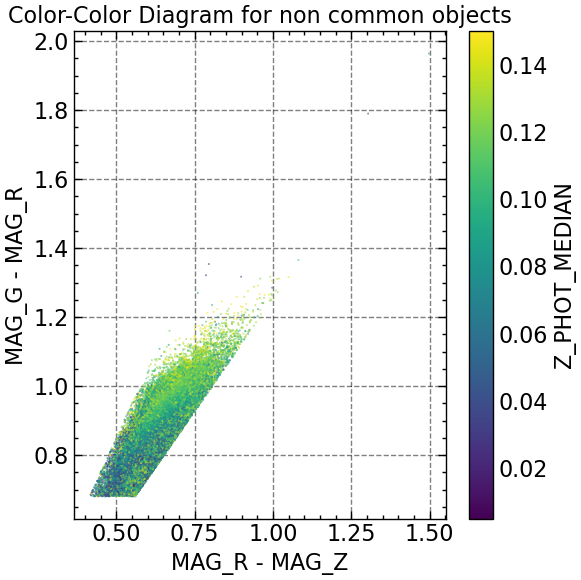

In [ ]:


zphot = np.array(unmatched_rows['Z_PHOT_MEDIAN'])
x = unmatched_rows["MAG_R"] - unmatched_rows["MAG_Z"]
y = unmatched_rows["MAG_G"] - unmatched_rows["MAG_R"]

# Create colormap and normalization
valid = zphot != -99
norm = Normalize(vmin=zphot[valid].min(), vmax=zphot[valid].max())
cmap = get_cmap('viridis')

# Compute RGBA colors
colors_all = np.zeros((len(zphot), 4))  # RGBA, shape (N, 4)
colors_all[valid] = cmap(norm(zphot[valid]))  # apply colormap to valid entries
colors_all[~valid] = [0, 0, 0, 1]  # black for zphot == -99

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color=colors_all, alpha=0.9, s=0.1)

plt.xlabel("MAG_R - MAG_Z")
plt.ylabel("MAG_G - MAG_R")480881
plt.title("Color-Color Diagram for non common objects")
plt.grid(True)

# Colorbar only for valid entries
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Z_PHOT_MEDIAN")
norm(zphot[valid]).data
plt.tight_layout()
plt.show()


In [ ]:
mask_unique=BGS_mask(unique_rows)

In [ ]:
unique_rows[mask_unique]

<Table length=417308>
BRICKID BRICKNAME OBJID  TYPE  ... Z_PHOT_MEDIAN  Z_PHOT_L95    bba    
 int32    bytes8  int32 bytes3 ...    float32      float32    float32  
------- --------- ----- ------ ... ------------- ----------- ----------
 165253  0027m300   965    SER ...    0.11925707     0.07404  0.3566815
 165253  0027m300  8018    SER ...    0.08216938  0.05233359 0.66600186
 165254  0030m300  2729    SER ...    0.10260826 0.079693824 0.63829523
 165255  0033m300  2437    SER ...    0.07002529 0.041350946 0.43626264
 165257  0038m300  6111    SER ...   0.093006395 0.044483088  0.4701828
 165258  0041m300   690    SER ...   0.070030585 0.044504732 0.57411796
 165266  0064m300  1729    SER ...    0.13275577   0.0908464 0.39360768
 165268  0070m300  7351    SER ...   0.090361975  0.05069076  0.5534431
 165269  0073m300  7954    SER ...    0.10372513  0.08676631 0.71952134
    ...       ...   ...    ... ...           ...         ...        ...
 660579  2116p845  1862    SER ...    0.10301611  0.08409676  0.6092153
 660579  2116p845  2505    SER ...    0.09055841 0.062672496 0.42952955
 660586  2294p845  1726    SER ...    0.06976705  0.05100605  0.8831478
 660695  1522p847   219    SER ...    0.09160549 0.043874353 0.61283404
 660697  1575p847   840    SER ...   0.100320764  0.08006803  0.6401773
 660698  1601p847  1380    SER ...    0.10183158 0.070040725  0.4519773
 660715  2051p847   236    SER ...    0.11776026  0.08540427 0.74483454
 660717  2104p847  1140    SER ...    0.09539273  0.03794344 0.35948086
 660717  2104p847  1522    SER ...   0.052471332 0.036581036 0.59714377
 660718  2130p847  1798    SER ...   0.119084015  0.07577214  0.9162768

In [ ]:
mask_unmatched=BGS_mask(unmatched_rows)
unmatched_rows[mask_unmatched]

<Table length=63575>
BRICKID BRICKNAME OBJID TYPE ... MAG_NOEXT_Z Z_PHOT_MEDIAN  Z_PHOT_L95 
 int32     str8   int32 str3 ...   float32      float32      float32   
------- --------- ----- ---- ... ----------- ------------- ------------
 326196  0371m007  3000  SER ...   17.378082    0.07897235  0.057566054
 326196  0371m007  3058  SER ...  15.7501335    0.09622078   0.06397838
 326196  0371m007  3091  SER ...   14.753273    0.06491999   0.03911662
 326196  0371m007  3889  SER ...   15.771027    0.07522254   0.06129543
 330518  0376p000  2694  SER ...   16.792141    0.14954486   0.09452175
 326197  0373m007   433  SER ...   15.779274    0.03089841   0.02015233
 326197  0373m007  1542  DEV ...   16.996239   0.097553335    0.0714637
 323316  0371m012   358  SER ...   15.052814    0.07322473  0.036685575
 323316  0371m012   702  SER ...   16.583342    0.07060929  0.053166658
    ...       ...   ...  ... ...         ...           ...          ...
 514052  3499p335  2632  DEV ...   17.222866   0.098029405  0.063345306
 506784  3513p320  3024  DEV ...   17.440405   0.095135525   0.08117476
 499393  3517p305  3474  DEV ...   16.560287    0.07080133  0.054692473
 520022  3510p347   895  DEV ...   16.676443    0.08568983  0.071757905
 501870  3519p310   967  DEV ...   14.534295    0.07558204   0.03740882
 500633  3517p307  1595  SER ...   13.781831   0.031369664  0.022878937
 520024  3516p347  1195  DEV ...   14.851068    0.09000582  0.049831253
 520024  3516p347  2318  DEV ...   16.637436    0.09706364   0.07418011
 505559  3510p317  1666  DEV ...   16.601147    0.08807625 0.0051932205
 496903  3517p300  3087  DEV ...   17.072876    0.13394591   0.09571468

(array([   4.,   36.,   30.,   65.,   76.,   78.,  117.,  148.,  254.,
         341.,  472.,  525.,  595.,  748.,  877.,  951.,  964., 1049.,
        1147., 1077., 1336., 1322., 1434., 1330., 1379., 1456., 1583.,
        1616., 1547., 1660., 1643., 1759., 1650., 1813., 1906., 1970.,
        2074., 2148., 2214., 2154., 2106., 2048., 2082., 2006., 2148.,
        1955., 2083., 1875., 1910., 1814.]),
 array([0.00144   , 0.00341114, 0.00538228, 0.00735342, 0.00932456,
        0.0112957 , 0.01326684, 0.01523798, 0.01720912, 0.01918026,
        0.0211514 , 0.02312254, 0.02509368, 0.02706482, 0.02903596,
        0.0310071 , 0.03297824, 0.03494938, 0.03692052, 0.03889166,
        0.04086279, 0.04283394, 0.04480508, 0.04677622, 0.04874736,
        0.0507185 , 0.05268963, 0.05466077, 0.05663192, 0.05860306,
        0.0605742 , 0.06254534, 0.06451648, 0.06648762, 0.06845875,
        0.07042989, 0.07240103, 0.07437217, 0.07634331, 0.07831445,
        0.08028559, 0.08225673, 0.08422787, 0.08619902, 

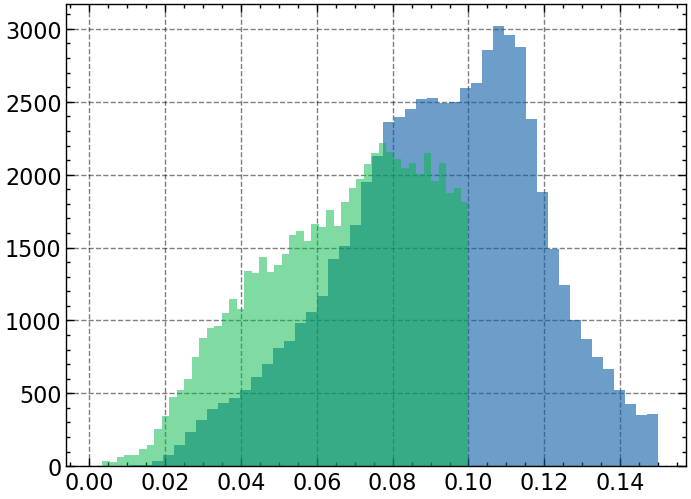

In [ ]:
plt.hist(unmatched_rows['Z_PHOT_MEDIAN'].data,bins=50,alpha=0.6)
plt.hist(unmatched_rows['Z_PHOT_L95'].data,bins=50,alpha=0.5)


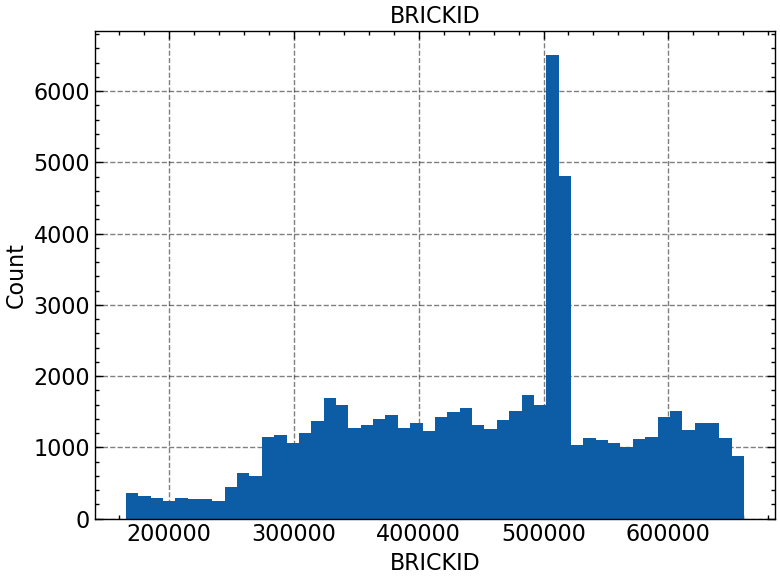

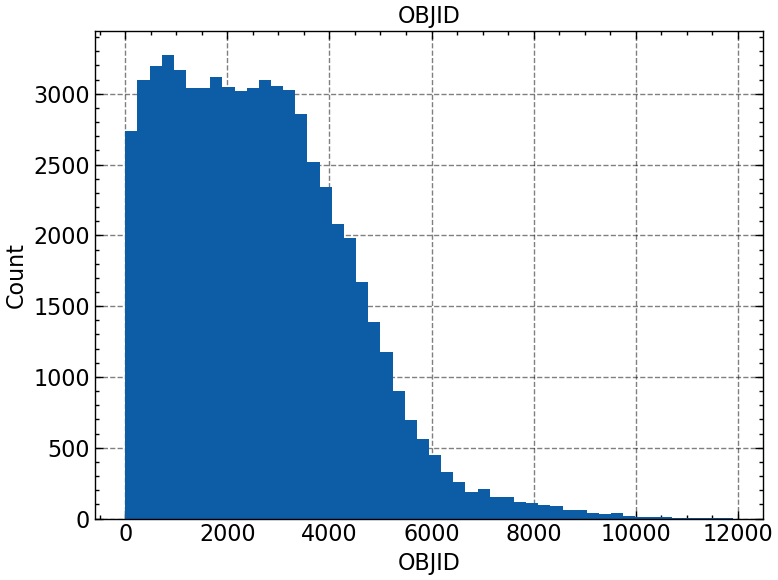

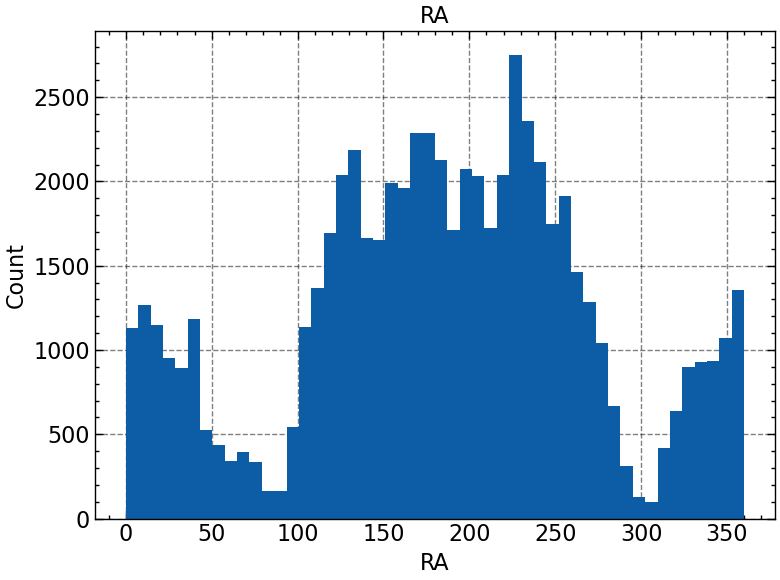

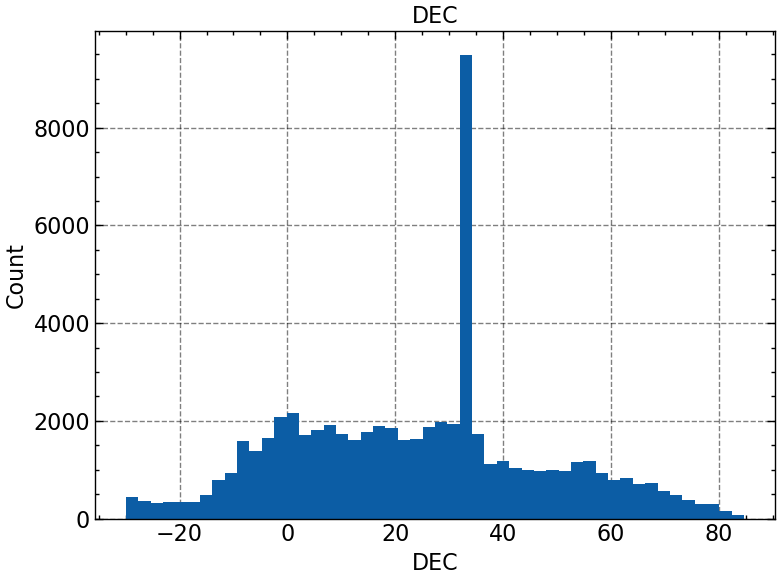

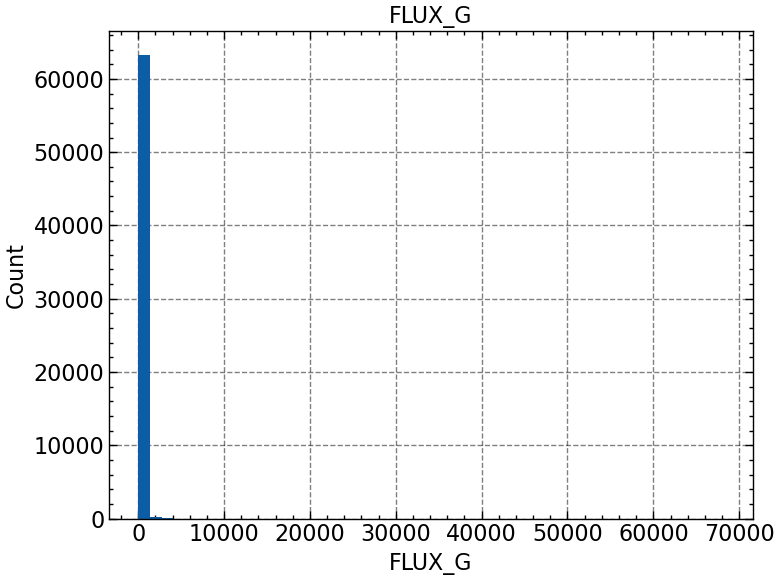

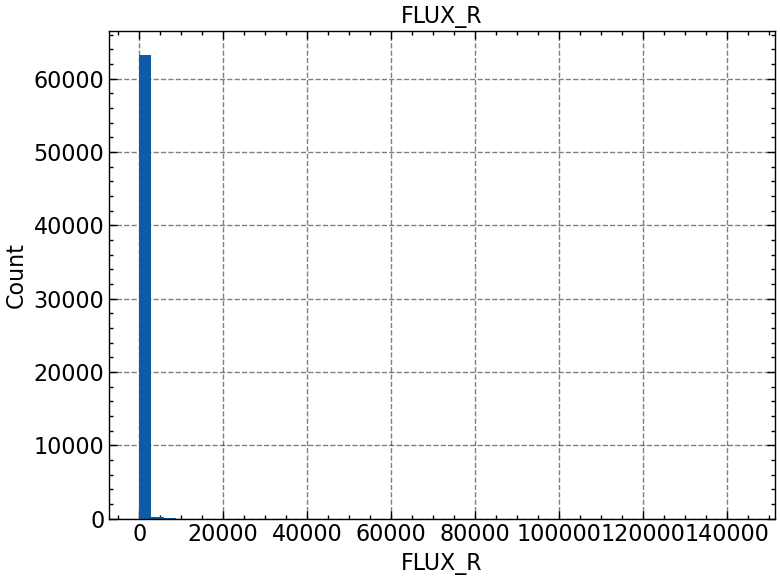

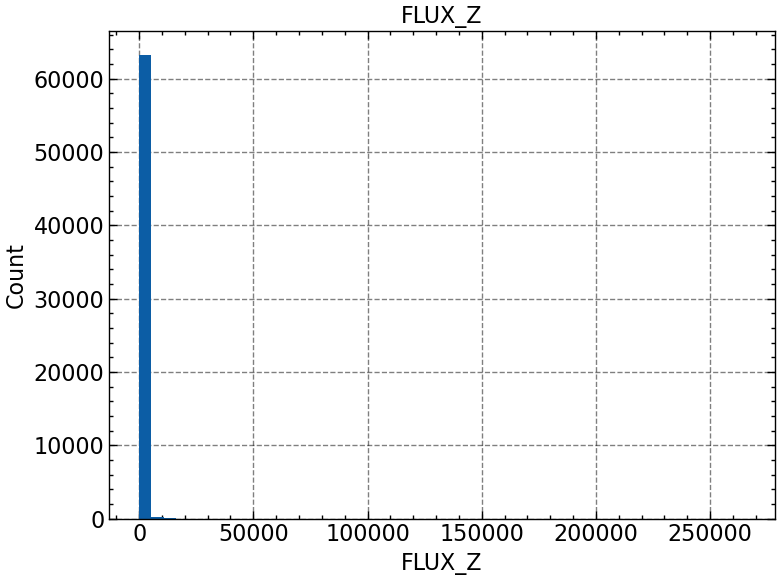

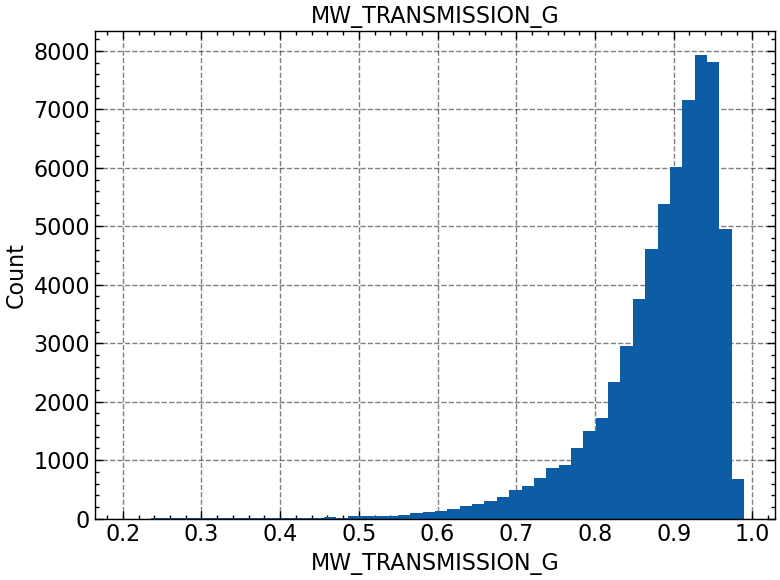

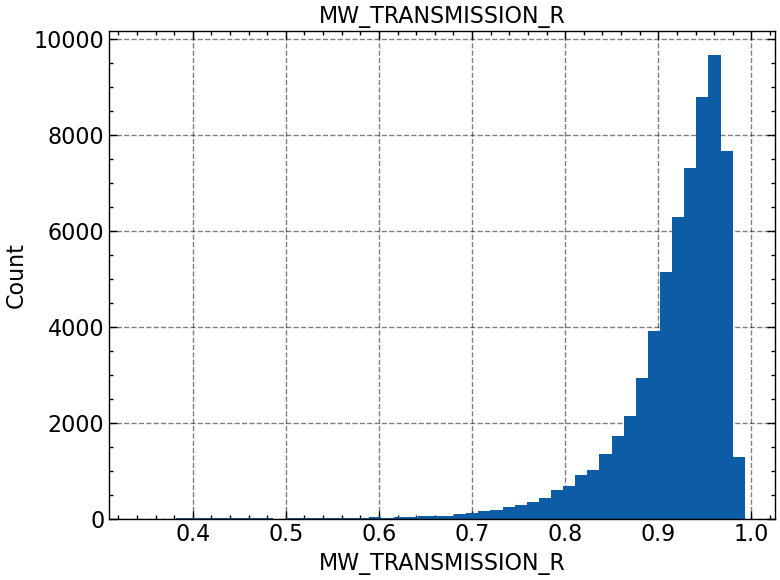

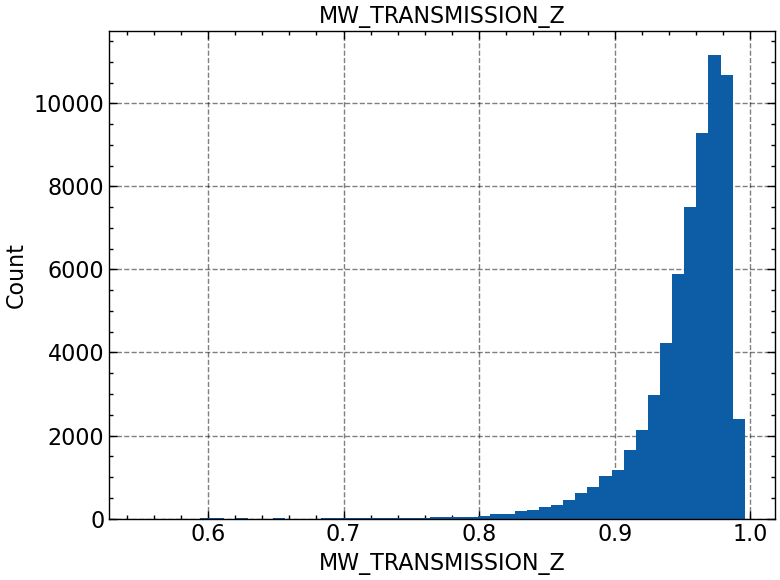

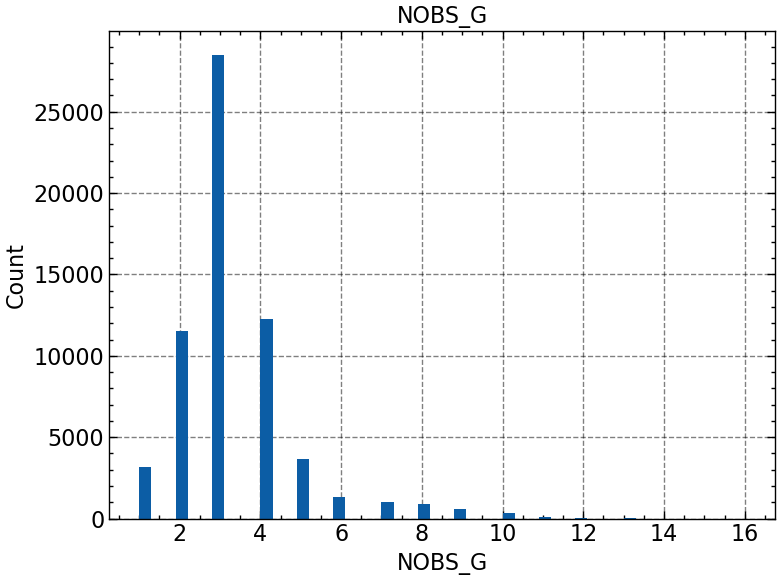

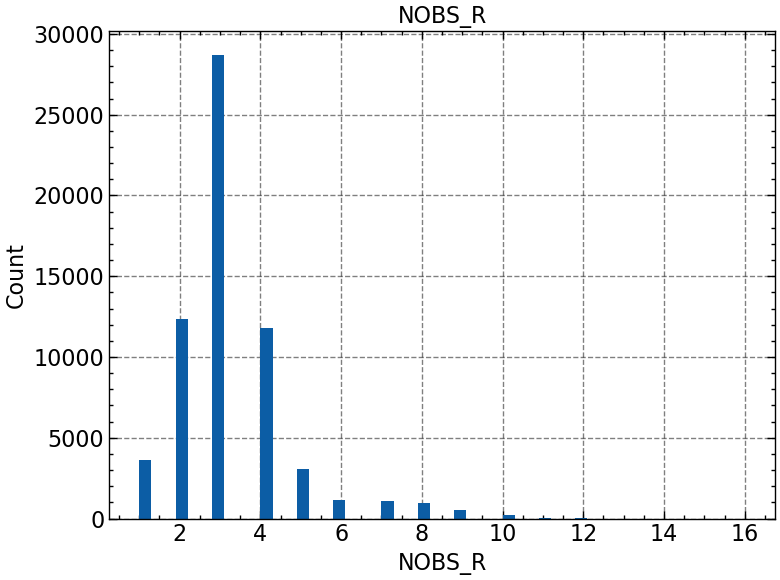

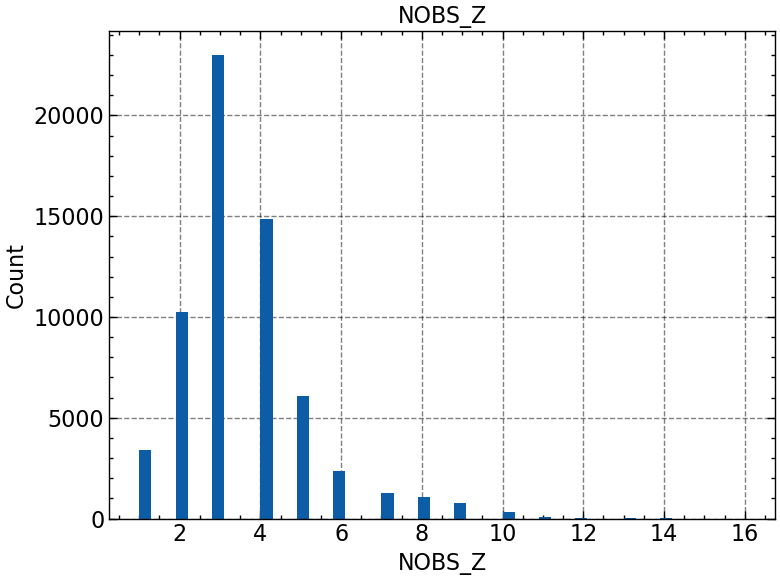

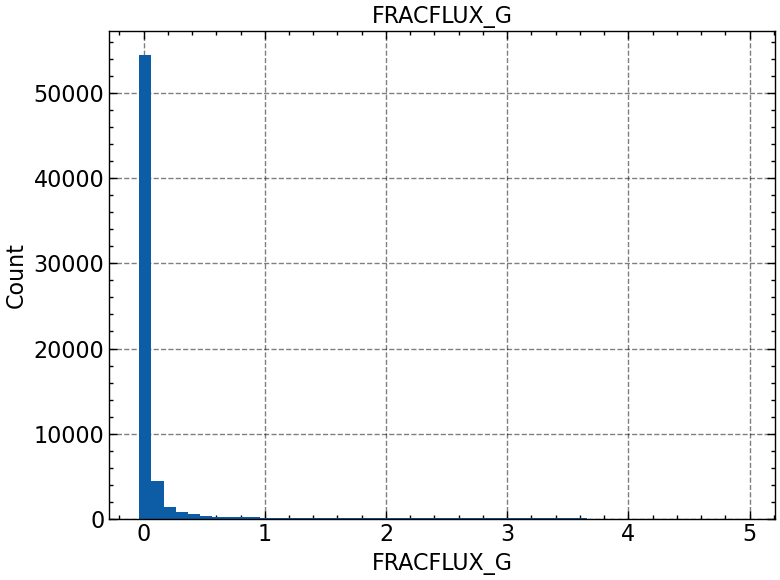

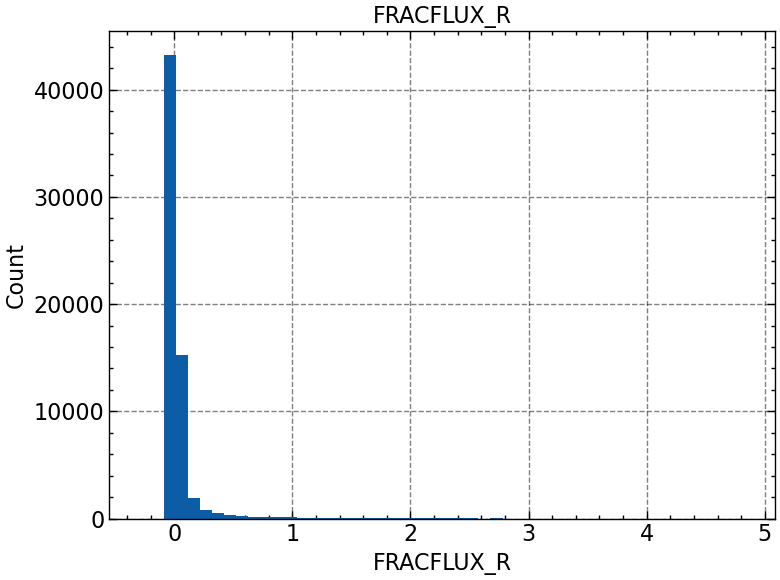

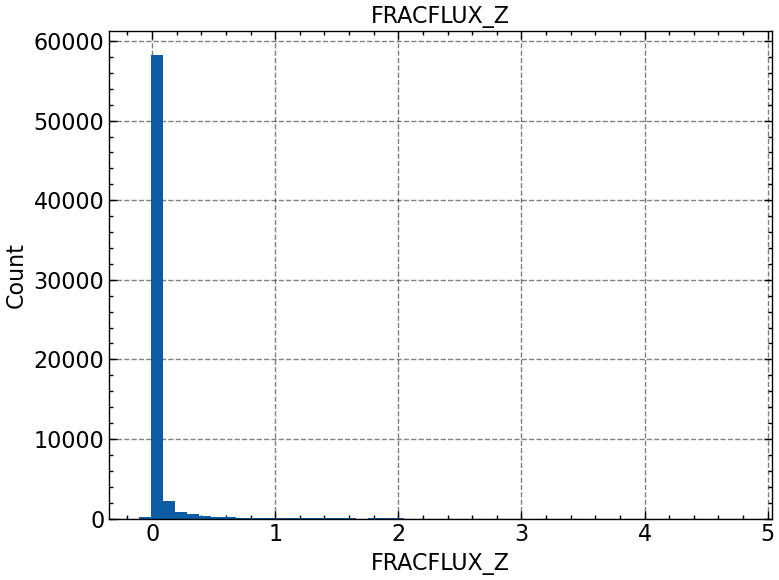

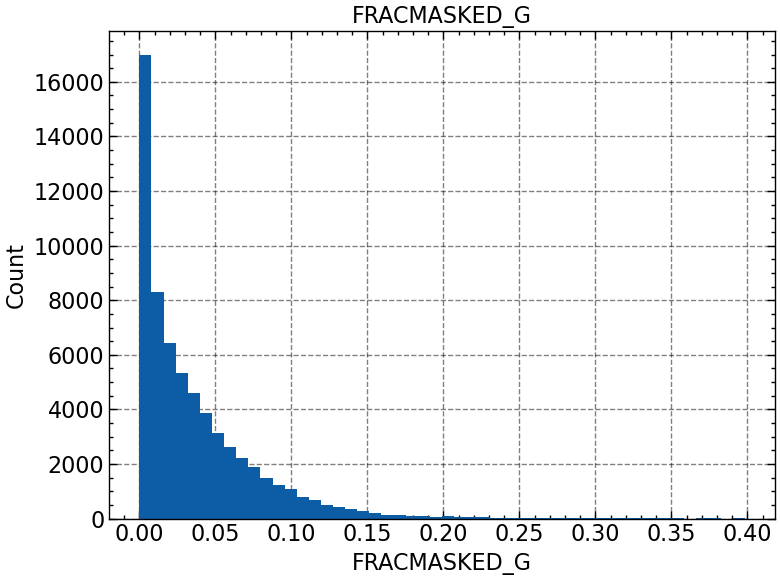

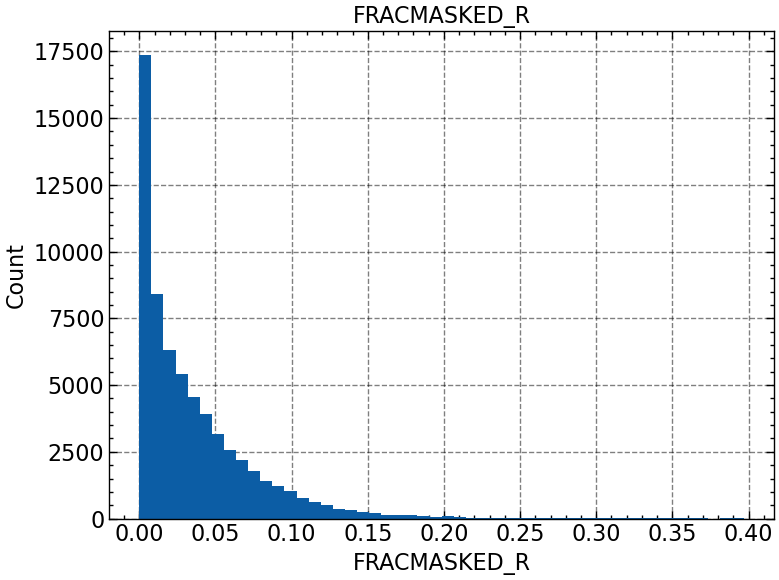

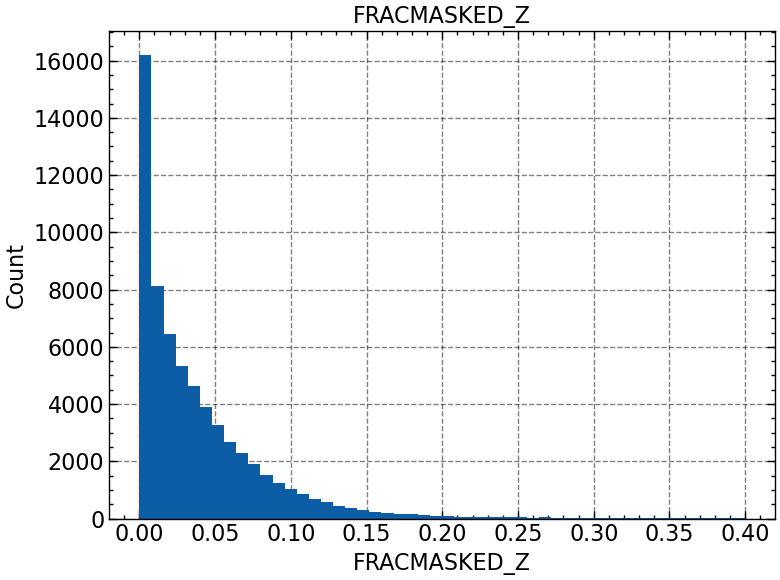

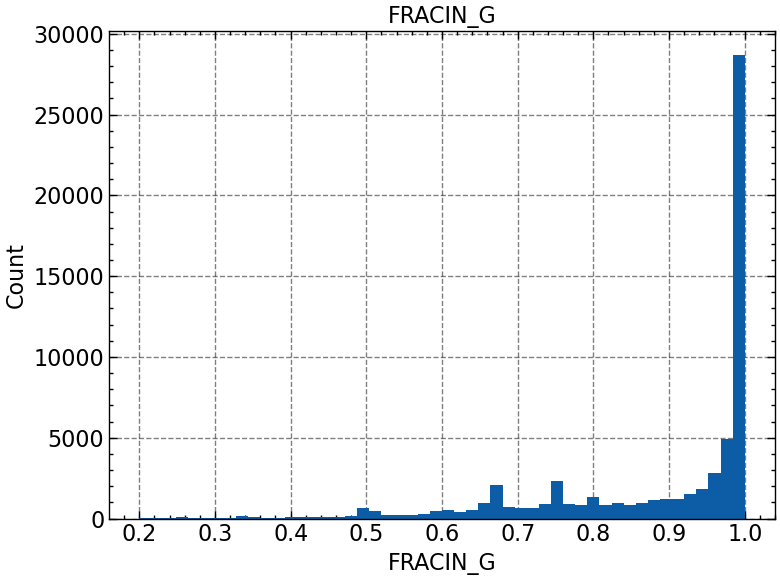

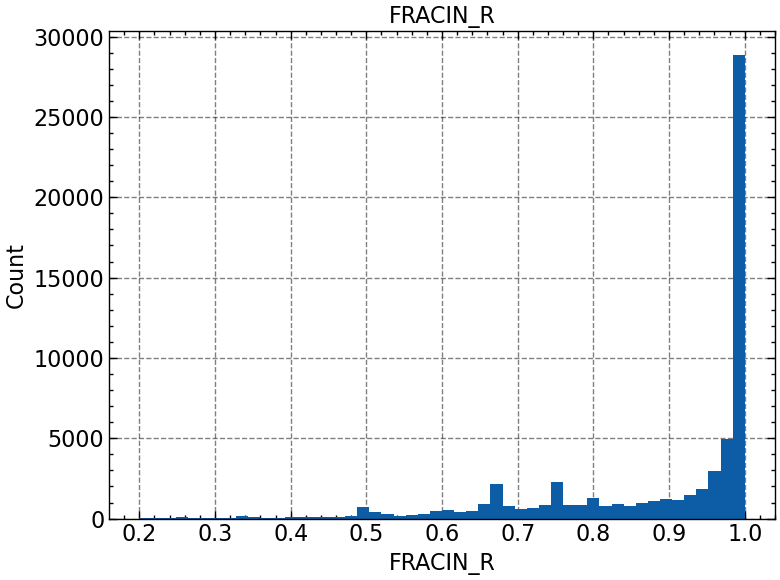

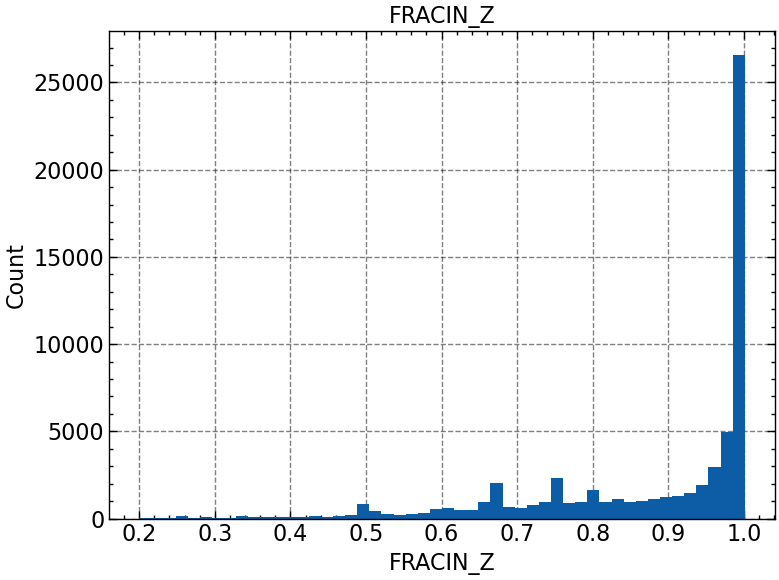

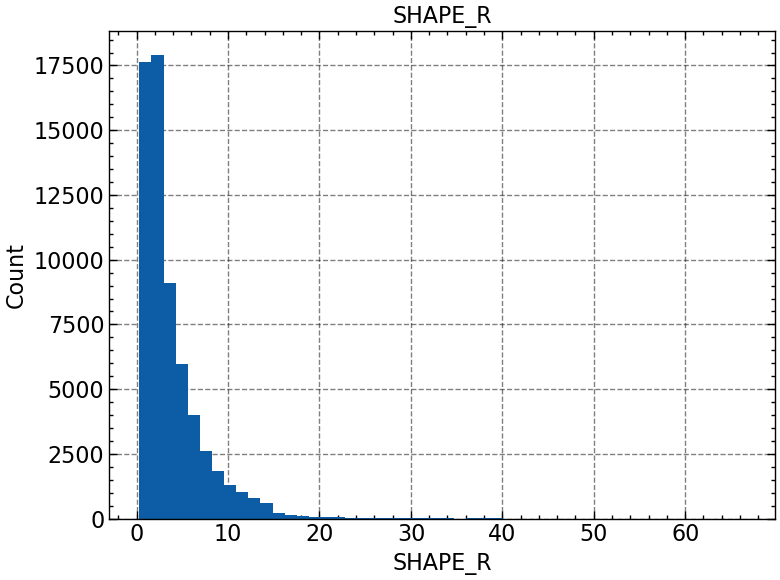

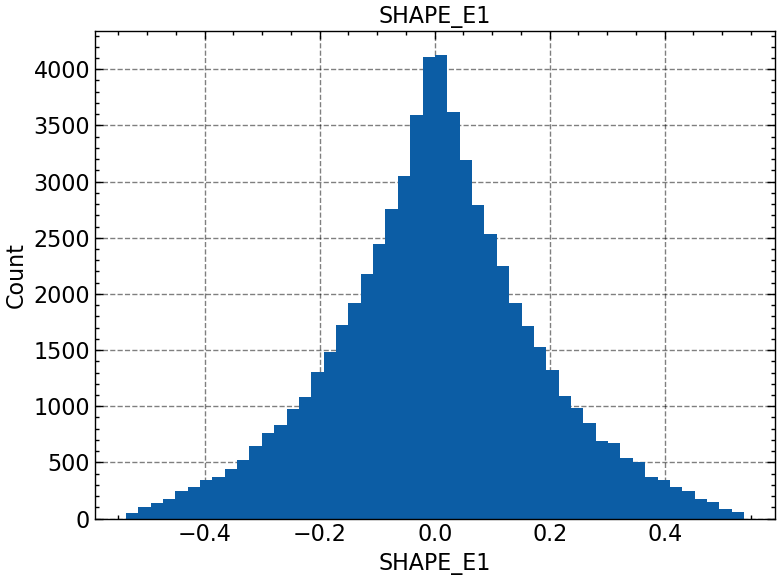

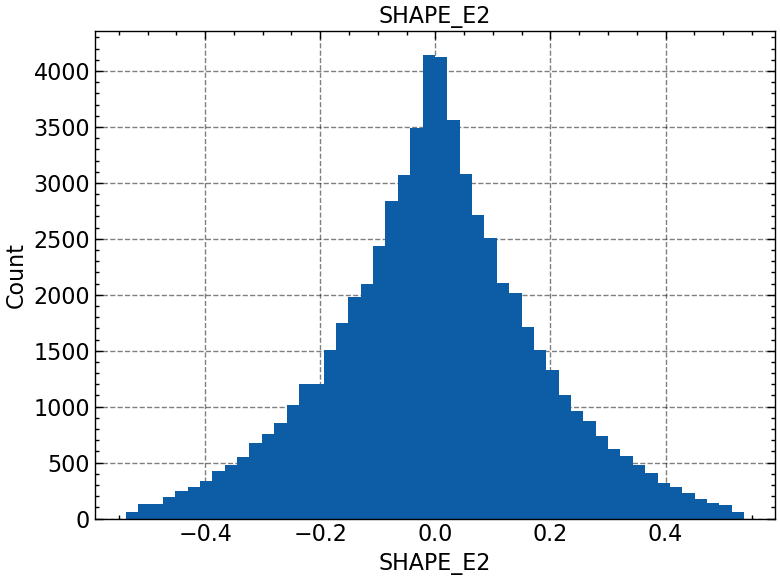

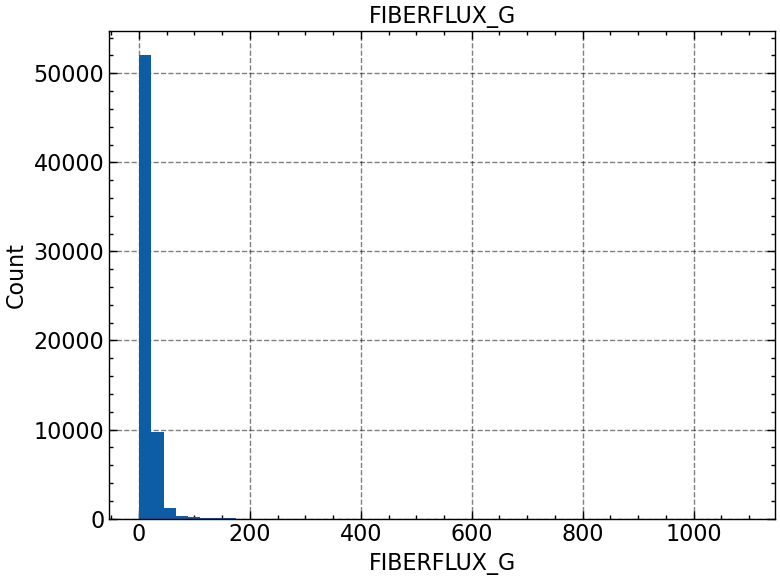

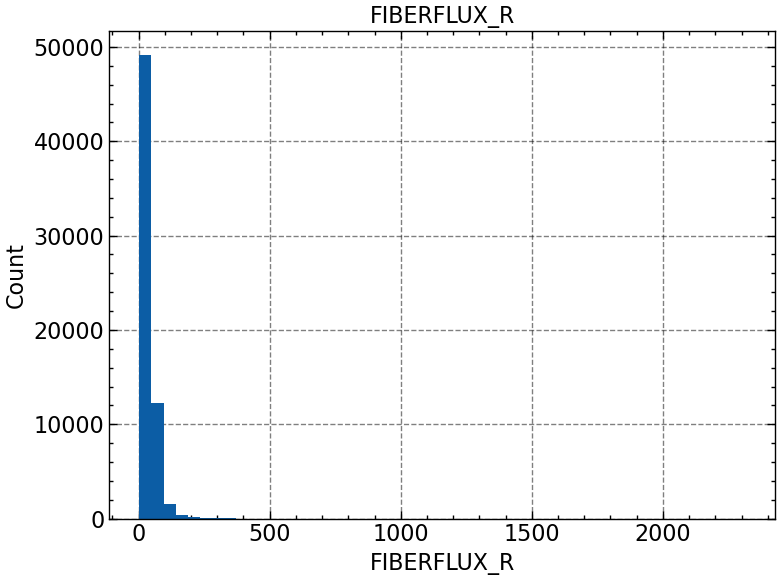

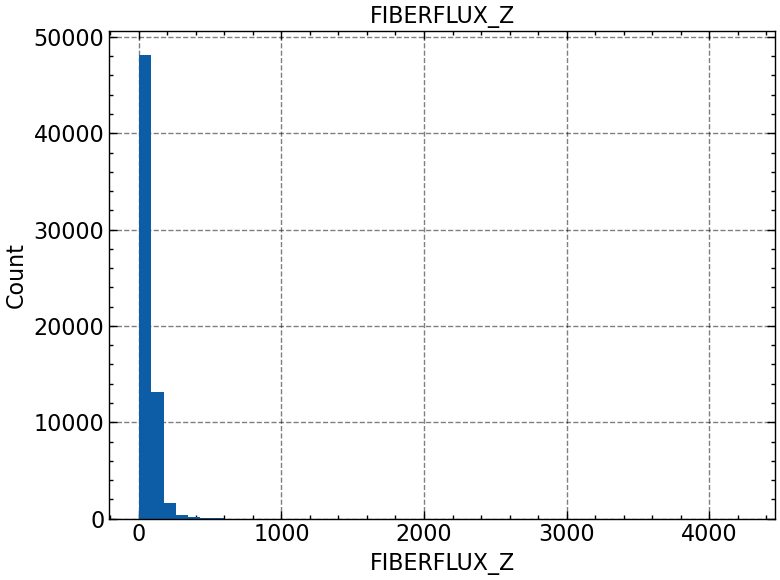

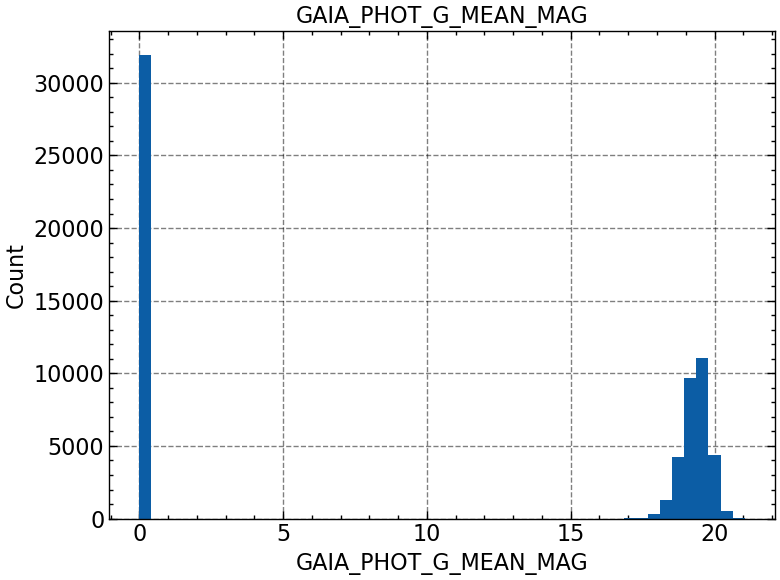

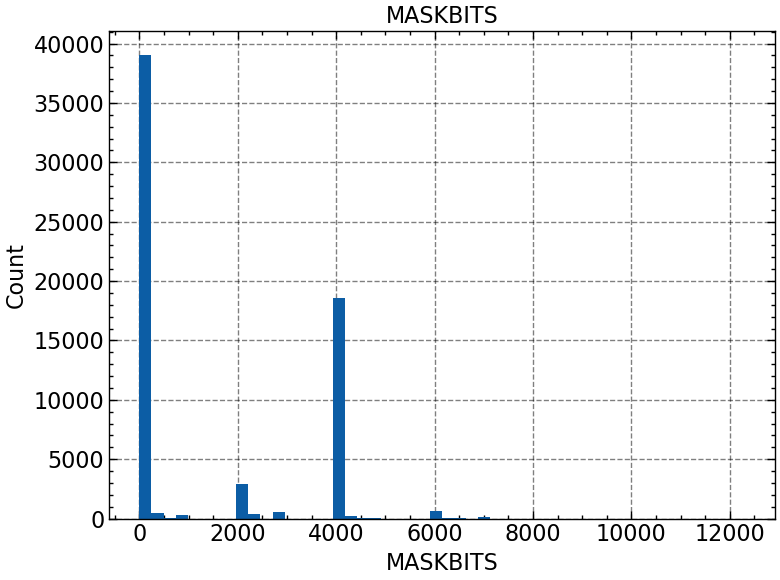

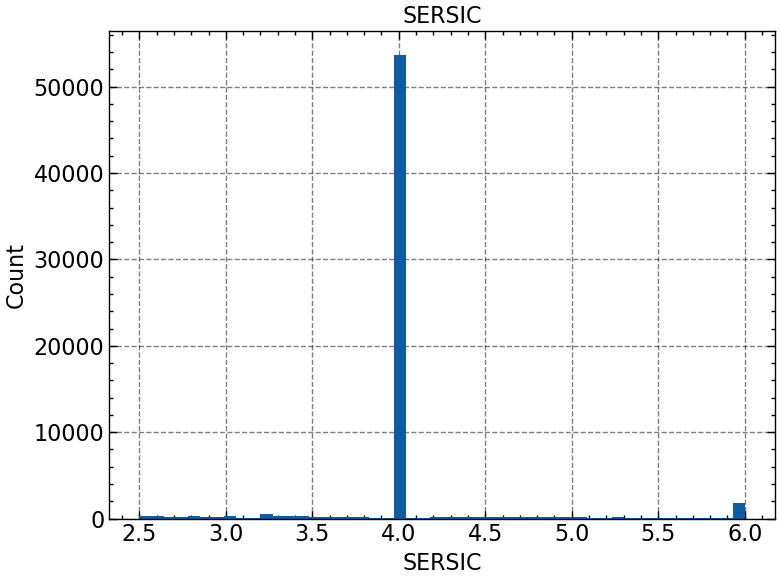

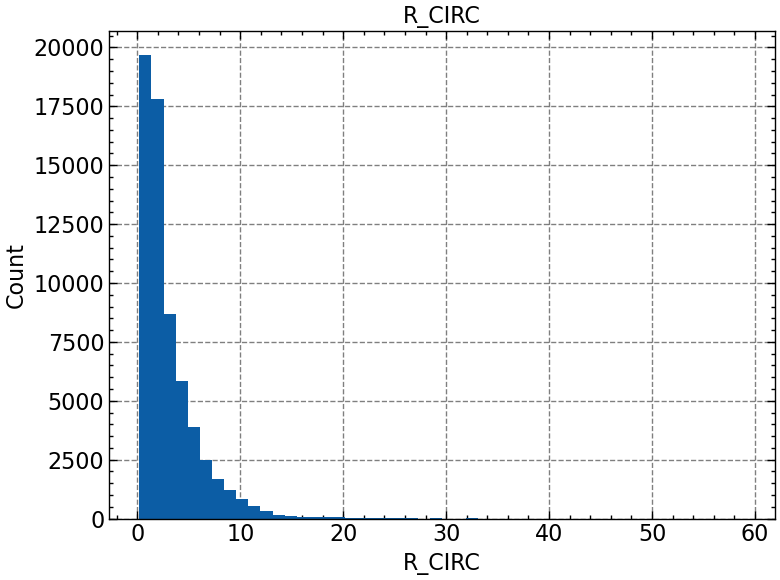

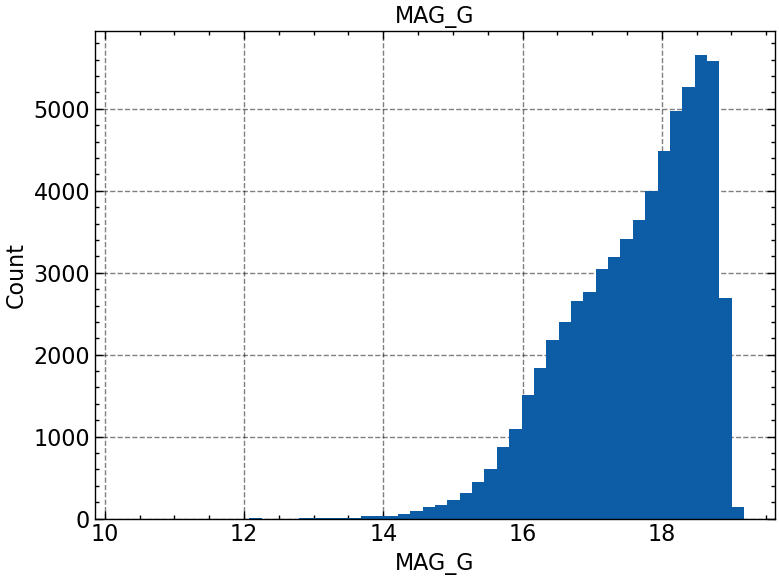

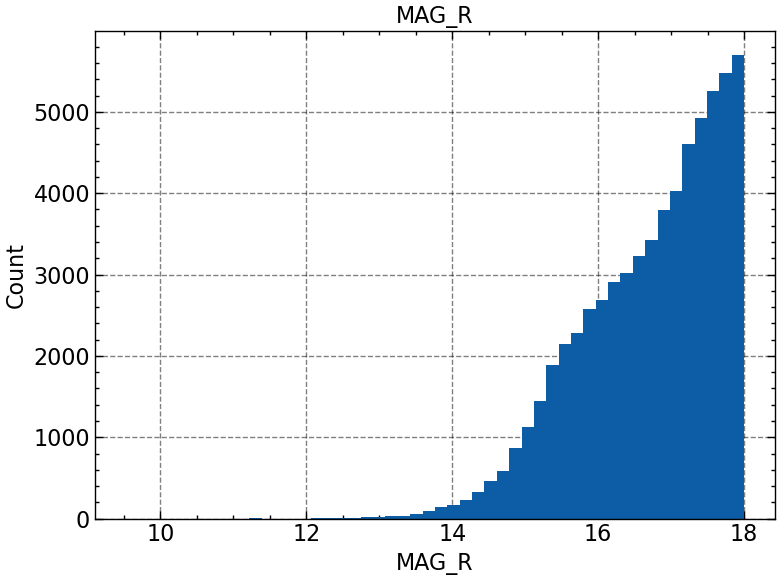

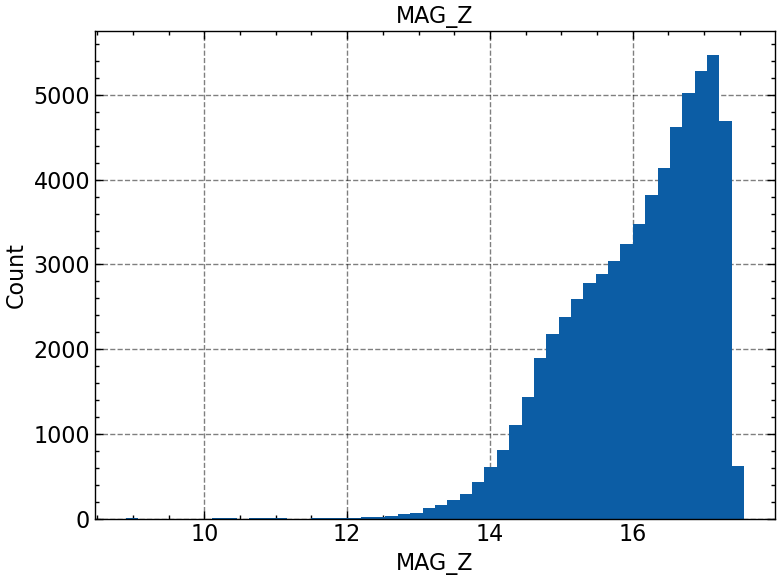

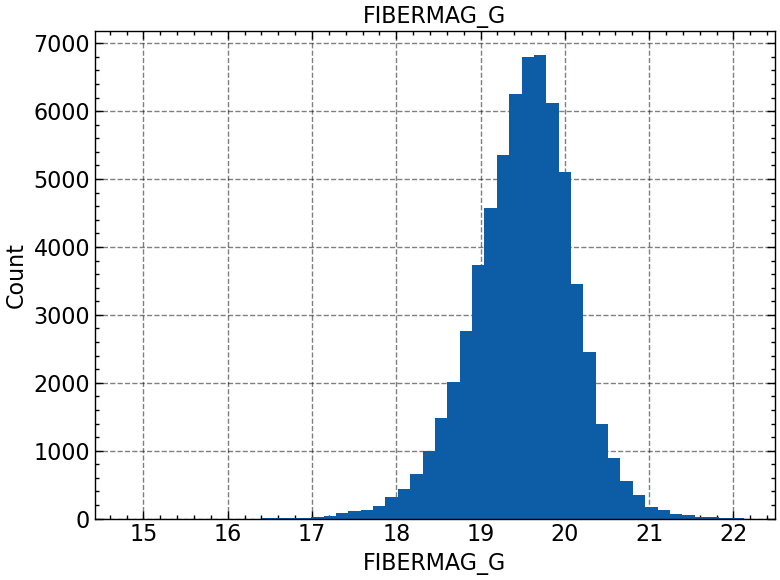

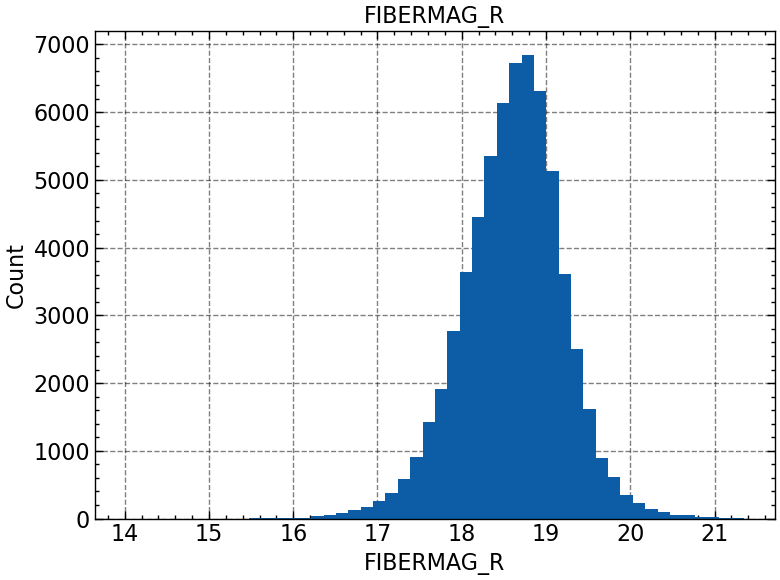

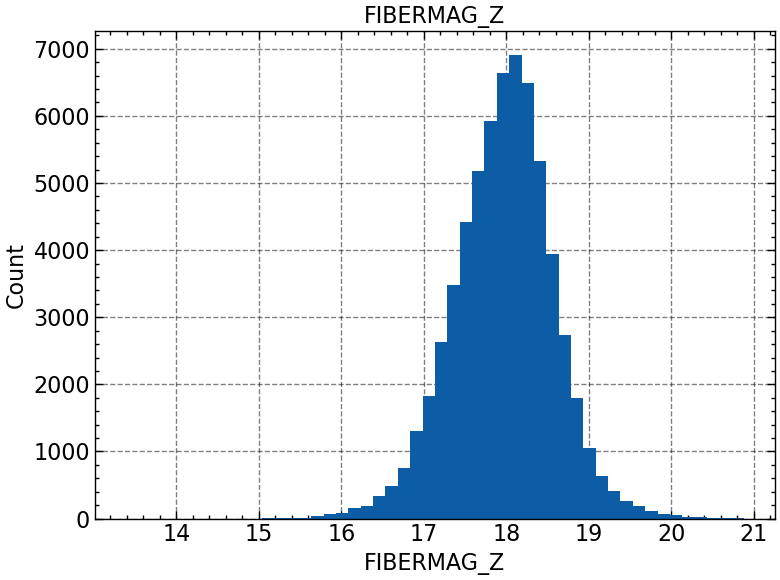

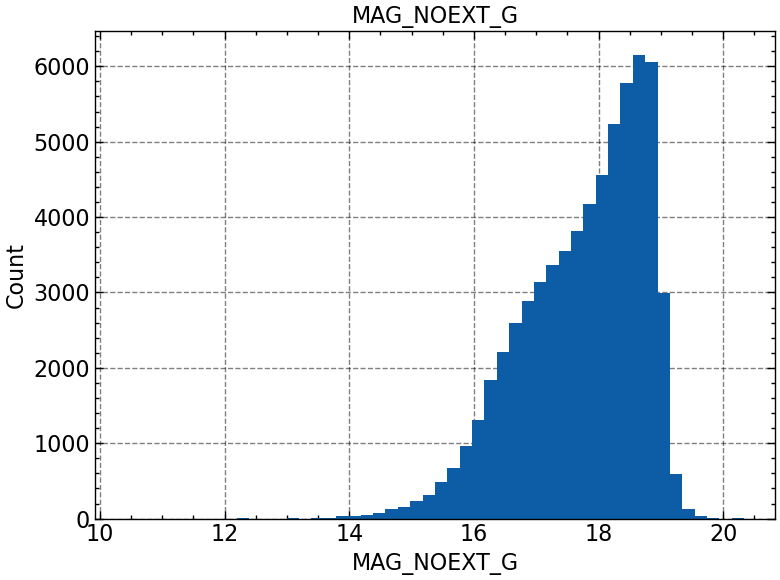

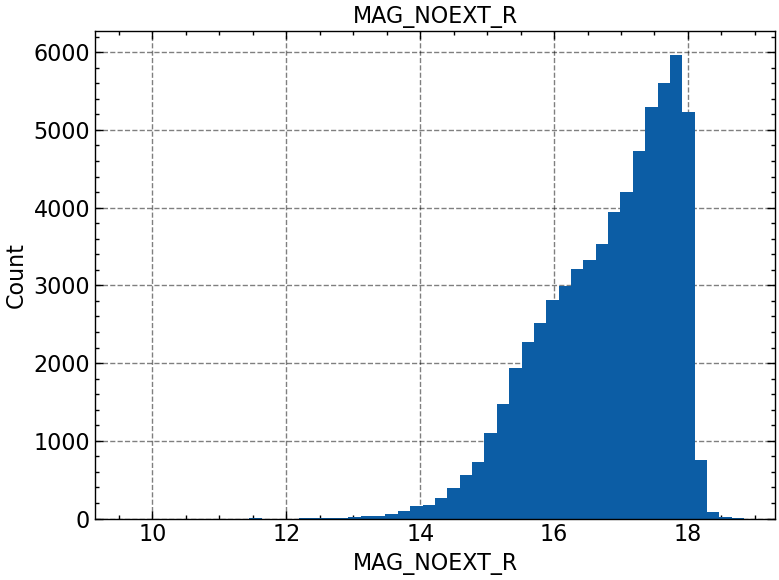

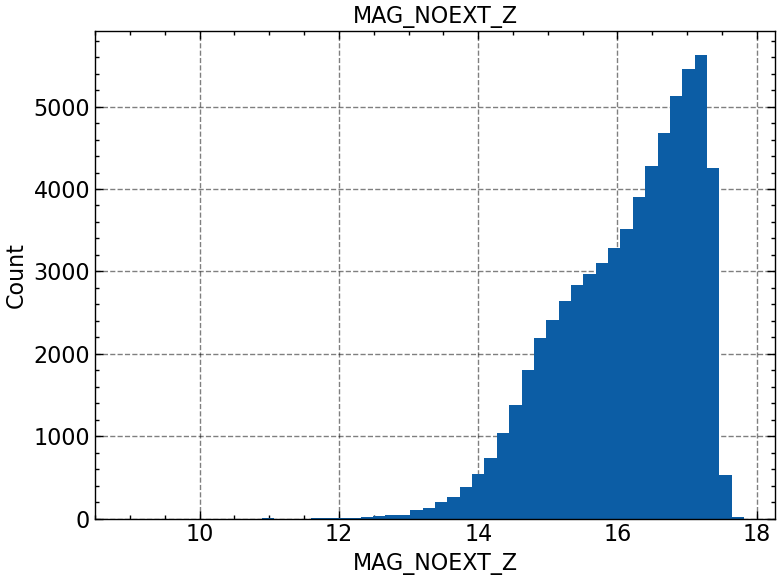

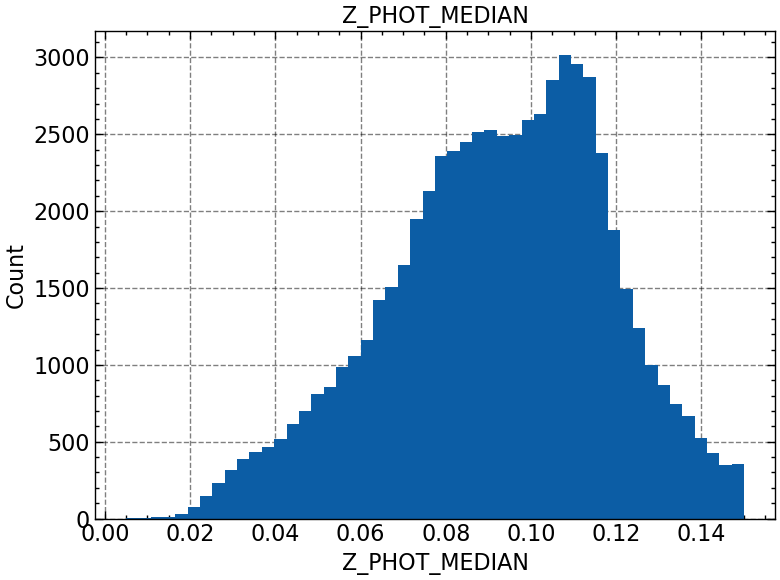

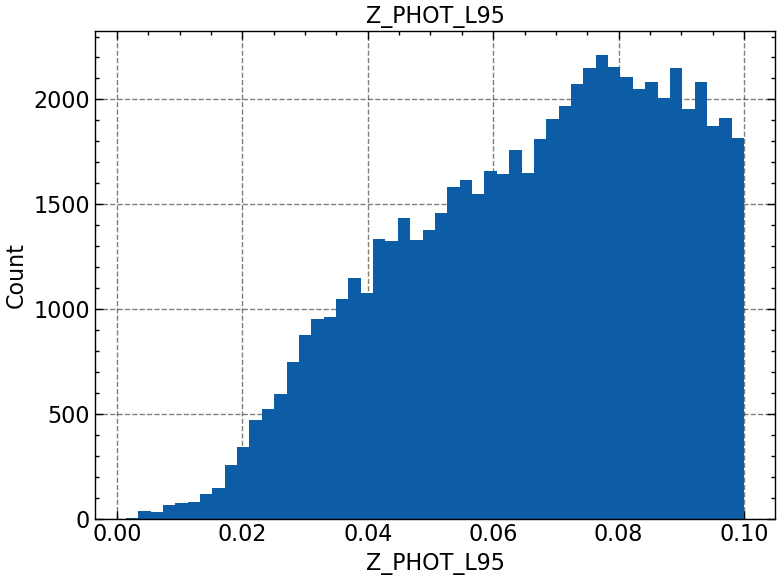

In [ ]:
for column in unmatched_rows.columns:
    if np.issubdtype(unmatched_rows[column].dtype, np.number):
        plt.figure(figsize=(8, 6))
        plt.hist(unmatched_rows[column], bins=50)
        plt.title(f"{column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [25]:
import pandas as pd

In [6]:
df=pd.read_parquet('/user/animesh.sah/DESI_PECVEL/summary_cuts_south_v3_selection_code.parquet')

In [7]:
df['masked']

0         508
1        1717
2        7905
3      721405
4       82686
        ...  
450      3406
451      3035
452      3826
453    229556
454         1
Name: masked, Length: 455, dtype: int64

In [9]:
df.columns

Index(['name', 'total', 'masked', 'cuts', 'cumulative', 'final_table_length'], dtype='object')

In [11]:
sum(df['final_table_length'])-339407

86274

In [26]:
import pickle

In [27]:
with open("south_dict_v1.pkl", "rb") as f:
    merged = pickle.load(f)

In [28]:
south_new=merged[BGS_mask(merged)]

In [32]:
table_south_cut

<Table length=339405>
BRICKID BRICKNAME OBJID TYPE ... MAG_NOEXT_Z Z_PHOT_MEDIAN  Z_PHOT_L95
 int32     str8   int32 str3 ...   float32      float32      float32  
------- --------- ----- ---- ... ----------- ------------- -----------
 328953  0063m002   590  SER ...   14.819491    0.06403214 0.044679843
 328953  0063m002  6221  SER ...   15.506475    0.08380653  0.06967464
 328953  0063m002  6645  SER ...   15.496998      0.032462 0.024623377
 330393  0063p000  7270  SER ...   14.650226    0.04460466 0.009056895
 314552  0061m027  3772  SER ...   14.821316   0.058474883  0.04874303
 314552  0061m027  5305  SER ...   15.886721    0.06834267 0.054366756
 314552  0061m027  8631  SER ...   16.511524    0.08575495 0.061975703
 314552  0061m027  8875  DEV ...   14.890286     0.0877763 0.057850536
 320313  0063m017  1371  SER ...   15.615322    0.12317456  0.07555613
    ...       ...   ...  ... ...         ...           ...         ...
 517648  3517p342  2267  SER ...   17.212357    0.11272225 0.091795705
 517648  3517p342  3274  SER ...   15.967974    0.08233855  0.05750808
 503101  3511p312  3204  SER ...   17.240036    0.10271839  0.08060728
 503101  3511p312  4483  SER ...   16.908295    0.10713543 0.068402044
 501867  3511p310  3302  SER ...  15.3581705   0.043379687  0.03198362
 501867  3511p310  4479  SER ...    17.32791    0.10823335 0.028643869
 516453  3514p340  2393  SER ...   14.327591    0.05968383  0.04983318
 516453  3514p340  2449  SER ...   16.335615   0.053964674 0.020479206
 516453  3514p340  3057  SER ...   13.240189    0.04145728 0.028693072
 516453  3514p340  3085  SER ...   17.267239   0.065075934 0.040532216

In [31]:
south_new=south_new[south_new['DEC']>-30]
south_new

<Table length=337336>
BRICKID BRICKNAME OBJID TYPE ... MAG_NOEXT_Z Z_PHOT_MEDIAN  Z_PHOT_L95
 int32     str8   int32 str3 ...   float32      float32      float32  
------- --------- ----- ---- ... ----------- ------------- -----------
 328953  0063m002   590  SER ...   14.819491    0.06403214 0.044679843
 328953  0063m002  6221  SER ...   15.506475    0.08380653  0.06967464
 328953  0063m002  6645  SER ...   15.496998      0.032462 0.024623377
 330393  0063p000  7270  SER ...   14.650226    0.04460466 0.009056895
 314552  0061m027  3772  SER ...   14.821316   0.058474883  0.04874303
 314552  0061m027  5305  SER ...   15.886721    0.06834267 0.054366756
 314552  0061m027  8631  SER ...   16.511524    0.08575495 0.061975703
 314552  0061m027  8875  DEV ...   14.890286     0.0877763 0.057850536
 320313  0063m017  8625  SER ...   14.523875    0.08616348 0.078627735
    ...       ...   ...  ... ...         ...           ...         ...
 517648  3517p342  2267  SER ...   17.212357    0.11272225 0.091795705
 517648  3517p342  3274  SER ...   15.967974    0.08233855  0.05750808
 503101  3511p312  3204  SER ...   17.240036    0.10271839  0.08060728
 503101  3511p312  4483  SER ...   16.908295    0.10713543 0.068402044
 501867  3511p310  3302  SER ...  15.3581705   0.043379687  0.03198362
 501867  3511p310  4479  SER ...    17.32791    0.10823335 0.028643869
 516453  3514p340  2393  SER ...   14.327591    0.05968383  0.04983318
 516453  3514p340  2449  SER ...   16.335615   0.053964674 0.020479206
 516453  3514p340  3057  SER ...   13.240189    0.04145728 0.028693072
 516453  3514p340  3085  SER ...   17.267239   0.065075934 0.040532216

In [33]:
table = vstack([table_north_cut, south_new])
table = unique(table, keys=['BRICKID', 'OBJID','BRICKNAME'])
table 

<Table length=482026>
BRICKID BRICKNAME OBJID TYPE ... MAG_NOEXT_Z Z_PHOT_MEDIAN  Z_PHOT_L95
 int32     str8   int32 str3 ...   float32      float32      float32  
------- --------- ----- ---- ... ----------- ------------- -----------
 165253  0027m300   965  SER ...   17.294954    0.11925707     0.07404
 165253  0027m300  8018  SER ...   16.118214    0.08216938  0.05233359
 165254  0030m300  2729  SER ...  15.6581955    0.10260826 0.079693824
 165255  0033m300  2437  SER ...   16.099169    0.07002529 0.041350946
 165257  0038m300  6111  SER ...   16.547762   0.093006395 0.044483088
 165258  0041m300   690  SER ...   14.649475   0.070030585 0.044504732
 165266  0064m300  1729  SER ...   16.141155    0.13275577   0.0908464
 165268  0070m300  7351  SER ...    16.64287   0.090361975  0.05069076
 165269  0073m300  7954  SER ...   15.554827    0.10372513  0.08676631
    ...       ...   ...  ... ...         ...           ...         ...
 660586  2294p845  1726  SER ...   16.993856    0.06976705  0.05100605
 660695  1522p847   219  SER ...   15.728083    0.09160549 0.043874353
 660697  1575p847   840  SER ...   16.665165   0.100320764  0.08006803
 660698  1601p847  1380  SER ...   16.093006    0.10183158 0.070040725
 660699  1627p847   235  DEV ...   16.058279     0.1009251  0.06852107
 660715  2051p847   236  SER ...   17.410706    0.11776026  0.08540427
 660717  2104p847  1140  SER ...    16.97552    0.09539273  0.03794344
 660717  2104p847  1522  SER ...   15.397307   0.052471332 0.036581036
 660717  2104p847  2524  DEV ...   14.537093    0.05235307 0.032944713
 660718  2130p847  1798  SER ...   16.397552   0.119084015  0.07577214

In [42]:

common = join(
    table,
    final_unique_rows,
    keys=[  'BRICKID','OBJID','BRICKNAME'],
    join_type='inner')

In [43]:
final_unique_rows

<Table length=417308>
BRICKID BRICKNAME OBJID  TYPE  ... Z_PHOT_MEDIAN  Z_PHOT_L95    bba    
 int32    bytes8  int32 bytes3 ...    float32      float32    float32  
------- --------- ----- ------ ... ------------- ----------- ----------
 165253  0027m300   965    SER ...    0.11925707     0.07404  0.3566815
 165253  0027m300  8018    SER ...    0.08216938  0.05233359 0.66600186
 165254  0030m300  2729    SER ...    0.10260826 0.079693824 0.63829523
 165255  0033m300  2437    SER ...    0.07002529 0.041350946 0.43626264
 165257  0038m300  6111    SER ...   0.093006395 0.044483088  0.4701828
 165258  0041m300   690    SER ...   0.070030585 0.044504732 0.57411796
 165266  0064m300  1729    SER ...    0.13275577   0.0908464 0.39360768
 165268  0070m300  7351    SER ...   0.090361975  0.05069076  0.5534431
 165269  0073m300  7954    SER ...    0.10372513  0.08676631 0.71952134
    ...       ...   ...    ... ...           ...         ...        ...
 660579  2116p845  1862    SER ...    0.10301611  0.08409676  0.6092153
 660579  2116p845  2505    SER ...    0.09055841 0.062672496 0.42952955
 660586  2294p845  1726    SER ...    0.06976705  0.05100605  0.8831478
 660695  1522p847   219    SER ...    0.09160549 0.043874353 0.61283404
 660697  1575p847   840    SER ...   0.100320764  0.08006803  0.6401773
 660698  1601p847  1380    SER ...    0.10183158 0.070040725  0.4519773
 660715  2051p847   236    SER ...    0.11776026  0.08540427 0.74483454
 660717  2104p847  1140    SER ...    0.09539273  0.03794344 0.35948086
 660717  2104p847  1522    SER ...   0.052471332 0.036581036 0.59714377
 660718  2130p847  1798    SER ...   0.119084015  0.07577214  0.9162768

In [44]:
common

<Table length=417308>
BRICKID BRICKNAME OBJID TYPE_1 ... Z_PHOT_MEDIAN_2 Z_PHOT_L95_2    bba    
 int32     str8   int32  str3  ...     float32       float32     float32  
------- --------- ----- ------ ... --------------- ------------ ----------
 165253  0027m300   965    SER ...      0.11925707      0.07404  0.3566815
 165253  0027m300  8018    SER ...      0.08216938   0.05233359 0.66600186
 165254  0030m300  2729    SER ...      0.10260826  0.079693824 0.63829523
 165255  0033m300  2437    SER ...      0.07002529  0.041350946 0.43626264
 165257  0038m300  6111    SER ...     0.093006395  0.044483088  0.4701828
 165258  0041m300   690    SER ...     0.070030585  0.044504732 0.57411796
 165266  0064m300  1729    SER ...      0.13275577    0.0908464 0.39360768
 165268  0070m300  7351    SER ...     0.090361975   0.05069076  0.5534431
 165269  0073m300  7954    SER ...      0.10372513   0.08676631 0.71952134
    ...       ...   ...    ... ...             ...          ...        ...
 660579  2116p845  1862    SER ...      0.10301611   0.08409676  0.6092153
 660579  2116p845  2505    SER ...      0.09055841  0.062672496 0.42952955
 660586  2294p845  1726    SER ...      0.06976705   0.05100605  0.8831478
 660695  1522p847   219    SER ...      0.09160549  0.043874353 0.61283404
 660697  1575p847   840    SER ...     0.100320764   0.08006803  0.6401773
 660698  1601p847  1380    SER ...      0.10183158  0.070040725  0.4519773
 660715  2051p847   236    SER ...      0.11776026   0.08540427 0.74483454
 660717  2104p847  1140    SER ...      0.09539273   0.03794344 0.35948086
 660717  2104p847  1522    SER ...     0.052471332  0.036581036 0.59714377
 660718  2130p847  1798    SER ...     0.119084015   0.07577214  0.9162768

In [2]:

import Corrfunc

from Corrfunc.mocks.DDtheta_mocks import DDtheta_mocks

from Corrfunc.io import read_catalog

from Corrfunc.utils import convert_3d_counts_to_cf
import glob
import fitsio
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [3]:
randoms='/storage/shadab/data/legacy_survey/dr9/randoms/randoms-1-*.fits'

files = glob.glob(randoms)
all_randoms = []
for f in files:
    data = fitsio.read(f)  # load only the columns you need
    #all_randoms.append(data)
    #print(f)
    break

In [4]:
table=Table(data)

KeyboardInterrupt: 

In [10]:
data.dtype

dtype([('RELEASE', '>i2'), ('BRICKID', '>i4'), ('BRICKNAME', '<U8'), ('BRICK_OBJID', '>i4'), ('RA', '>f8'), ('DEC', '>f8'), ('NOBS_G', '>i2'), ('NOBS_R', '>i2'), ('NOBS_Z', '>i2'), ('PSFDEPTH_G', '>f4'), ('PSFDEPTH_R', '>f4'), ('PSFDEPTH_Z', '>f4'), ('GALDEPTH_G', '>f4'), ('GALDEPTH_R', '>f4'), ('GALDEPTH_Z', '>f4'), ('PSFDEPTH_W1', '>f4'), ('PSFDEPTH_W2', '>f4'), ('PSFSIZE_G', '>f4'), ('PSFSIZE_R', '>f4'), ('PSFSIZE_Z', '>f4'), ('APFLUX_G', '>f4'), ('APFLUX_R', '>f4'), ('APFLUX_Z', '>f4'), ('APFLUX_IVAR_G', '>f4'), ('APFLUX_IVAR_R', '>f4'), ('APFLUX_IVAR_Z', '>f4'), ('MASKBITS', '>i2'), ('WISEMASK_W1', 'u1'), ('WISEMASK_W2', 'u1'), ('EBV', '>f4'), ('PHOTSYS', '<U1'), ('HPXPIXEL', '>i8'), ('TARGETID', '>i8'), ('DESI_TARGET', '>i8'), ('BGS_TARGET', '>i8'), ('MWS_TARGET', '>i8'), ('SUBPRIORITY', '>f8'), ('OBSCONDITIONS', '>i4'), ('PRIORITY_INIT', '>i8'), ('NUMOBS_INIT', '>i8'), ('SCND_TARGET', '>i8'), ('NUMOBS_MORE', '>i8'), ('NUMOBS', '>i8'), ('Z', '>f8'), ('ZWARN', '>i8'), ('TARGET_STA

In [23]:
rand_ra,rand_dec=prepare_coords(table['RA'],table['DEC'])

In [24]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')
ax.plot(rand_ra, rand_dec, ',')
#ax.plot(ra_n, dec_n, ',')
ax.grid(True)
plt.title('Mollweide Projection of RA/Dec for unmatched sources')
plt.show()

KeyboardInterrupt: 

In [4]:
data

array([(9010, 484720, '1180p277', 3074, 118.12595062, 27.63590231, 6, 4, 4, 2631.2607 , 632.3646 , 119.21796, 1820.2928 , 427.9681  , 68.72695 , 2.7121787, 0.8368302 , 1.6317412, 1.655873 , 1.335331 , -1.1289691e-03, -0.00202584,  0.00699174, 132775.56 , 32847.668, 3988.09  , 0, 0, 0, 0.03190804, 'S',  6220, 327858808279796738, 4, 0, 0, 0.82868621, 511, 3400, 4, 0, 4, 0, -1., -1, 'QSO|UNOBS', '2021-01-10T04:00:31', '0.48.0', 3400),
       (9011, 515806, '1566p340', 2106, 156.66768285, 33.96949344, 3, 4, 4,  773.0221 , 206.77533, 130.78317,  511.03296, 156.95474 , 80.369644, 3.0430787, 0.9434767 , 1.5313597, 2.0125241, 1.4627217,  2.4259882e-03, -0.00013918, -0.0113154 ,  99034.945, 45192.57 , 5255.1904, 0, 0, 0, 0.01675923, 'N',  5326, 327863336710441018, 4, 0, 0, 0.27199452, 511, 3400, 4, 0, 4, 0, -1., -1, 'QSO|UNOBS', '2021-01-10T04:00:34', '0.48.0', 3400),
       (9010, 296519, '1675m060', 1331, 167.48642756, -6.08404022, 4, 3, 4, 1829.5887 , 661.1986 , 131.1009 , 1177.203  , 395.32

In [5]:
rand_RA, rand_DEC, _ = read_catalog(random_catalog)

NameError: name 'random_catalog' is not defined

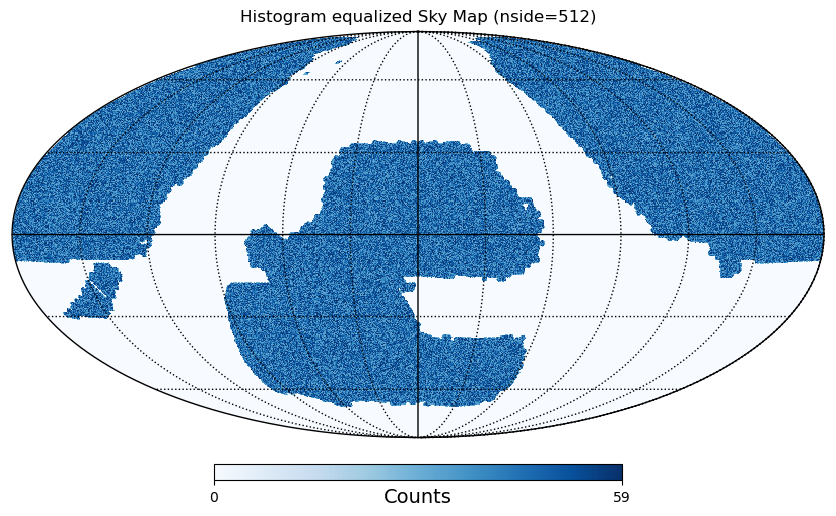

In [42]:
import healpy as hp
import numpy as np
import healpy.visufunc as hv
#ra_array=final_unique_rows['RA']
#dec_array=final_unique_rows['DEC']
nside =512
npix = hp.nside2npix(nside)

theta = np.radians(90.0 - np.rad2deg(rand_dec).data)  # theta = 0 at North Pole
phi = -np.radians(np.rad2deg(rand_ra).data) 
pix_indices = hp.ang2pix(nside, theta, phi)
hpx_map = np.zeros(npix, dtype=int)

ix,counts=np.unique(pix_indices,return_counts=True)
   # fill the fullsky map
hpx_map = np.zeros(npix, dtype=int)
hpx_map[ix] = counts
hp.mollview(hpx_map,cmap='Blues', unit='Counts',norm='hist',title=f"Histogram equalized Sky Map (nside={nside})")
hp.graticule()

In [33]:
len(rand_ra)

51738616

In [13]:
random_compiled = fitsio.FITS('/user/animesh.sah/FP_CUTS/randoms.fits')[1].read()

In [16]:
rand_table=Table(random_compiled)

In [18]:
rand_table = rand_table[rand_table['DEC'] > -30]

In [17]:
table_selection = Table(fitsio.FITS('table_match_final.fits')[1].read())


In [19]:
import numpy as np

import Corrfunc

from Corrfunc.mocks.DDtheta_mocks import DDtheta_mocks

from Corrfunc.io import read_catalog

from Corrfunc.utils import convert_3d_counts_to_cf

In [21]:
RA_data,DEC_data = table_selection['RA'], table_selection['DEC']
RA_random,DEC_random = rand_table['RA'], rand_table['DEC']  

In [33]:

rand_N = len(RA_random)
# Setup the bins
nbins = 10
bins = np.linspace(0.1, 10.0, nbins + 1) # note the +1 to nbins
# Number of threads to use
nthreads = 120
# Auto pair counts in DD
autocorr=1
DD_counts = DDtheta_mocks(autocorr, nthreads, bins,RA_data, DEC_data)
# Cross pair counts in DR
print('done with dd counts')
autocorr=0
DR_counts = DDtheta_mocks(autocorr, nthreads, bins,RA_data, DEC_data,RA2=RA_random, DEC2=DEC_random)

# Auto pairs counts in RR
print("done with dr counts")
autocorr=1

RR_counts = DDtheta_mocks(autocorr, nthreads, bins,RA_random,DEC_random)

# All the pair counts are done, get the angular correlation function
print('done with rr counts')
wtheta = convert_3d_counts_to_cf(N, N, rand_N, rand_N,DD_counts, DR_counts,DR_counts, RR_counts)


RuntimeError: RuntimeError occurred

In [ ]:
autocorr=0
DR_counts = DDtheta_mocks(autocorr, nthreads, bins,RA_data, DEC_data,RA2=RA_random, DEC2=DEC_random)


In [ ]:
with open('wtheta.pkl', 'wb') as f:
    pickle.dump(wtheta, f)

(array([362., 403., 301., 311., 348., 360., 440., 446., 499., 532., 576.,
        577., 573., 545., 500., 518., 454., 389., 325., 334., 267., 200.,
        164., 151., 102.,  94.,  62.,  51.,  51.,  23.,  14.,   9.,   8.,
          4.,   3.,   0.,   2.,   0.,   0.,   2.]),
 array([2.20572211e-05, 4.27572362e-02, 8.54924153e-02, 1.28227594e-01,
        1.70962773e-01, 2.13697952e-01, 2.56433131e-01, 2.99168310e-01,
        3.41903489e-01, 3.84638668e-01, 4.27373847e-01, 4.70109026e-01,
        5.12844205e-01, 5.55579384e-01, 5.98314563e-01, 6.41049743e-01,
        6.83784922e-01, 7.26520101e-01, 7.69255280e-01, 8.11990459e-01,
        8.54725638e-01, 8.97460817e-01, 9.40195996e-01, 9.82931175e-01,
        1.02566635e+00, 1.06840153e+00, 1.11113671e+00, 1.15387189e+00,
        1.19660707e+00, 1.23934225e+00, 1.28207743e+00, 1.32481261e+00,
        1.36754779e+00, 1.41028296e+00, 1.45301814e+00, 1.49575332e+00,
        1.53848850e+00, 1.58122368e+00, 1.62395886e+00, 1.66669404e+00,
      

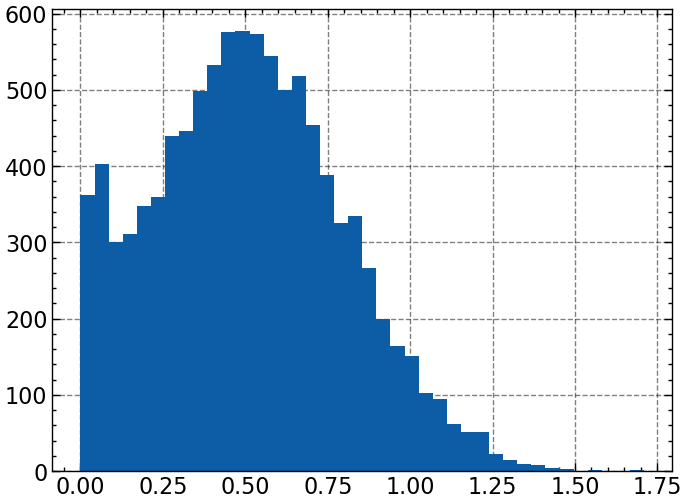

In [10]:
plt.hist(z,bins=40)

In [41]:
ra= np.random.normal(1,0.5,500000)
dec= np.random.uniform(-1,0.5,500000)
z = 0.5 + 0.3*np.sin(np.radians(dec)) + 0.2*np.cos(np.radians(ra-180)) #+np.random.normal(0,0.005,len(ra))
z = np.clip(z, 0, None) 

In [42]:
theta

array([0.63054806, 2.14352579, 1.45542613, ..., 1.56882144, 2.27067559,
       1.36668965])

In [43]:
nside=64
import healpy as hp
npix=hp.nside2npix(nside)
theta = np.pi/2 - dec
phi = ra
hpix = hp.ang2pix(nside, theta, phi)
hpx_map = np.full(npix, hp.UNSEEN, dtype=float)  # default UNSEEN for empty pixels

sum_z = np.bincount(hpix, weights=z, minlength=npix)
# Number of points per pixel
counts = np.bincount(hpix, minlength=npix)
# Mean Z per pixel
hpx_map = sum_z / counts

/tmp/ipykernel_36059/2895127996.py:13: RuntimeWarning: invalid value encountered in divide
  hpx_map = sum_z / counts


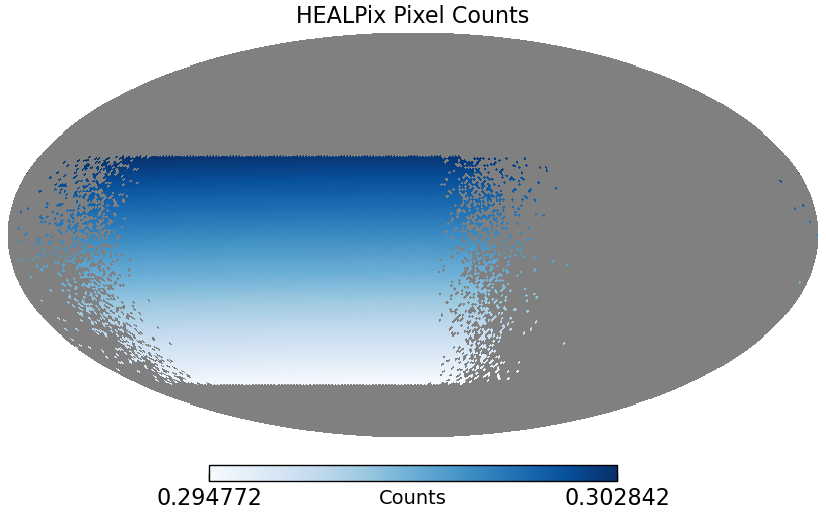

In [44]:
hp.mollview(hpx_map, title="HEALPix Pixel Counts", unit="Counts", cmap="Blues")
    #hp.mollview(hpx_map, title="Redshift distribution", unit="Counts", cmap="Blues", norm='hist')
#plt.gcf().savefig("healpix_z_hist.png", dpi=300, bbox_inches="tight")


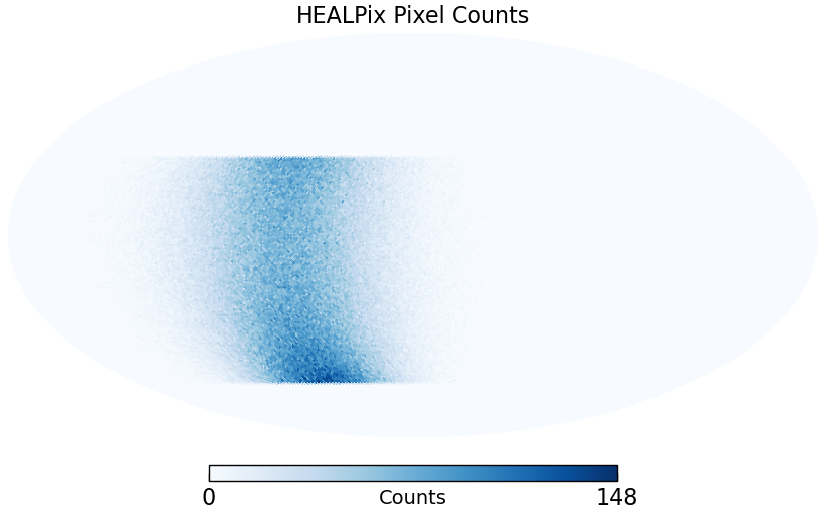

In [45]:
sum_z2 = np.bincount(hpix, minlength=npix)
hp.mollview(sum_z2, title="HEALPix Pixel Counts", unit="Counts", cmap="Blues")
